# Figure 5 Codes

In [42]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [43]:
import os
import sys
current_path = os.getcwd()
parent_directory = os.path.dirname(current_path)
sys.path.append(parent_directory)  # Adds the parent directory to the Python path
from Class.jenie import Jenie
import scanpy as sc
import anndata
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Figure A

Representative transcriptional UMAP and spatial map projection obtained of 1 year old control (upper) and 2 weeks post PTBP1-ASOs injected mice (lower) highlighting the clusters: Medial Ependymal (blue), Lateral Ependymal (red), SVZ-Stage 1 (green), SVZ-Stage 2 (light green), SVZ-Stage 3 (purple).

### Ingest control sample to svz neurogenesis pathway

In [44]:
# svz reference path for ingestion (from 4 weeks old data)
ref = sc.read("../DataF/fig5/final_reference_4week_svz.h5ad")


In [45]:
# control dataset
noninj2 = sc.read("../DataF/fig5/adatasvz_neuro_noastro_non_injected_3_2_iset1.h5ad")

In [46]:
# ingest control data to svz reference
d = noninj2

vars1 = list(d.var.index)
vars2 = list(ref.var.index)
varsf = np.intersect1d(vars1,vars2)
print("Genes in common:",len(varsf))
d = d[:,varsf]
ref2 = ref[:,varsf]
sc.pp.pca(d,n_comps=50)
sc.pp.pca(ref2,n_comps=50)
sc.tl.ingest(d,ref2,obs='neurogenesis_pathway')



Genes in common: 275
h3
Distances type: <class 'scipy.sparse._csr.csr_matrix'>


h1


### Plot svz neurogensis pathway of ingested control data

In [47]:
neu_groups =         ["GABAergic striatum neurons",
        "Lateral ependymal",
        "Medial ependymal",
        "Stage 1",
        "Stage 2",
        "Stage 3",
        "SVZ oligos",]


In [48]:
noninj2j = Jenie(d, "noninj2ingested", "noninj2ingested", "neurogenesis_pathway")


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


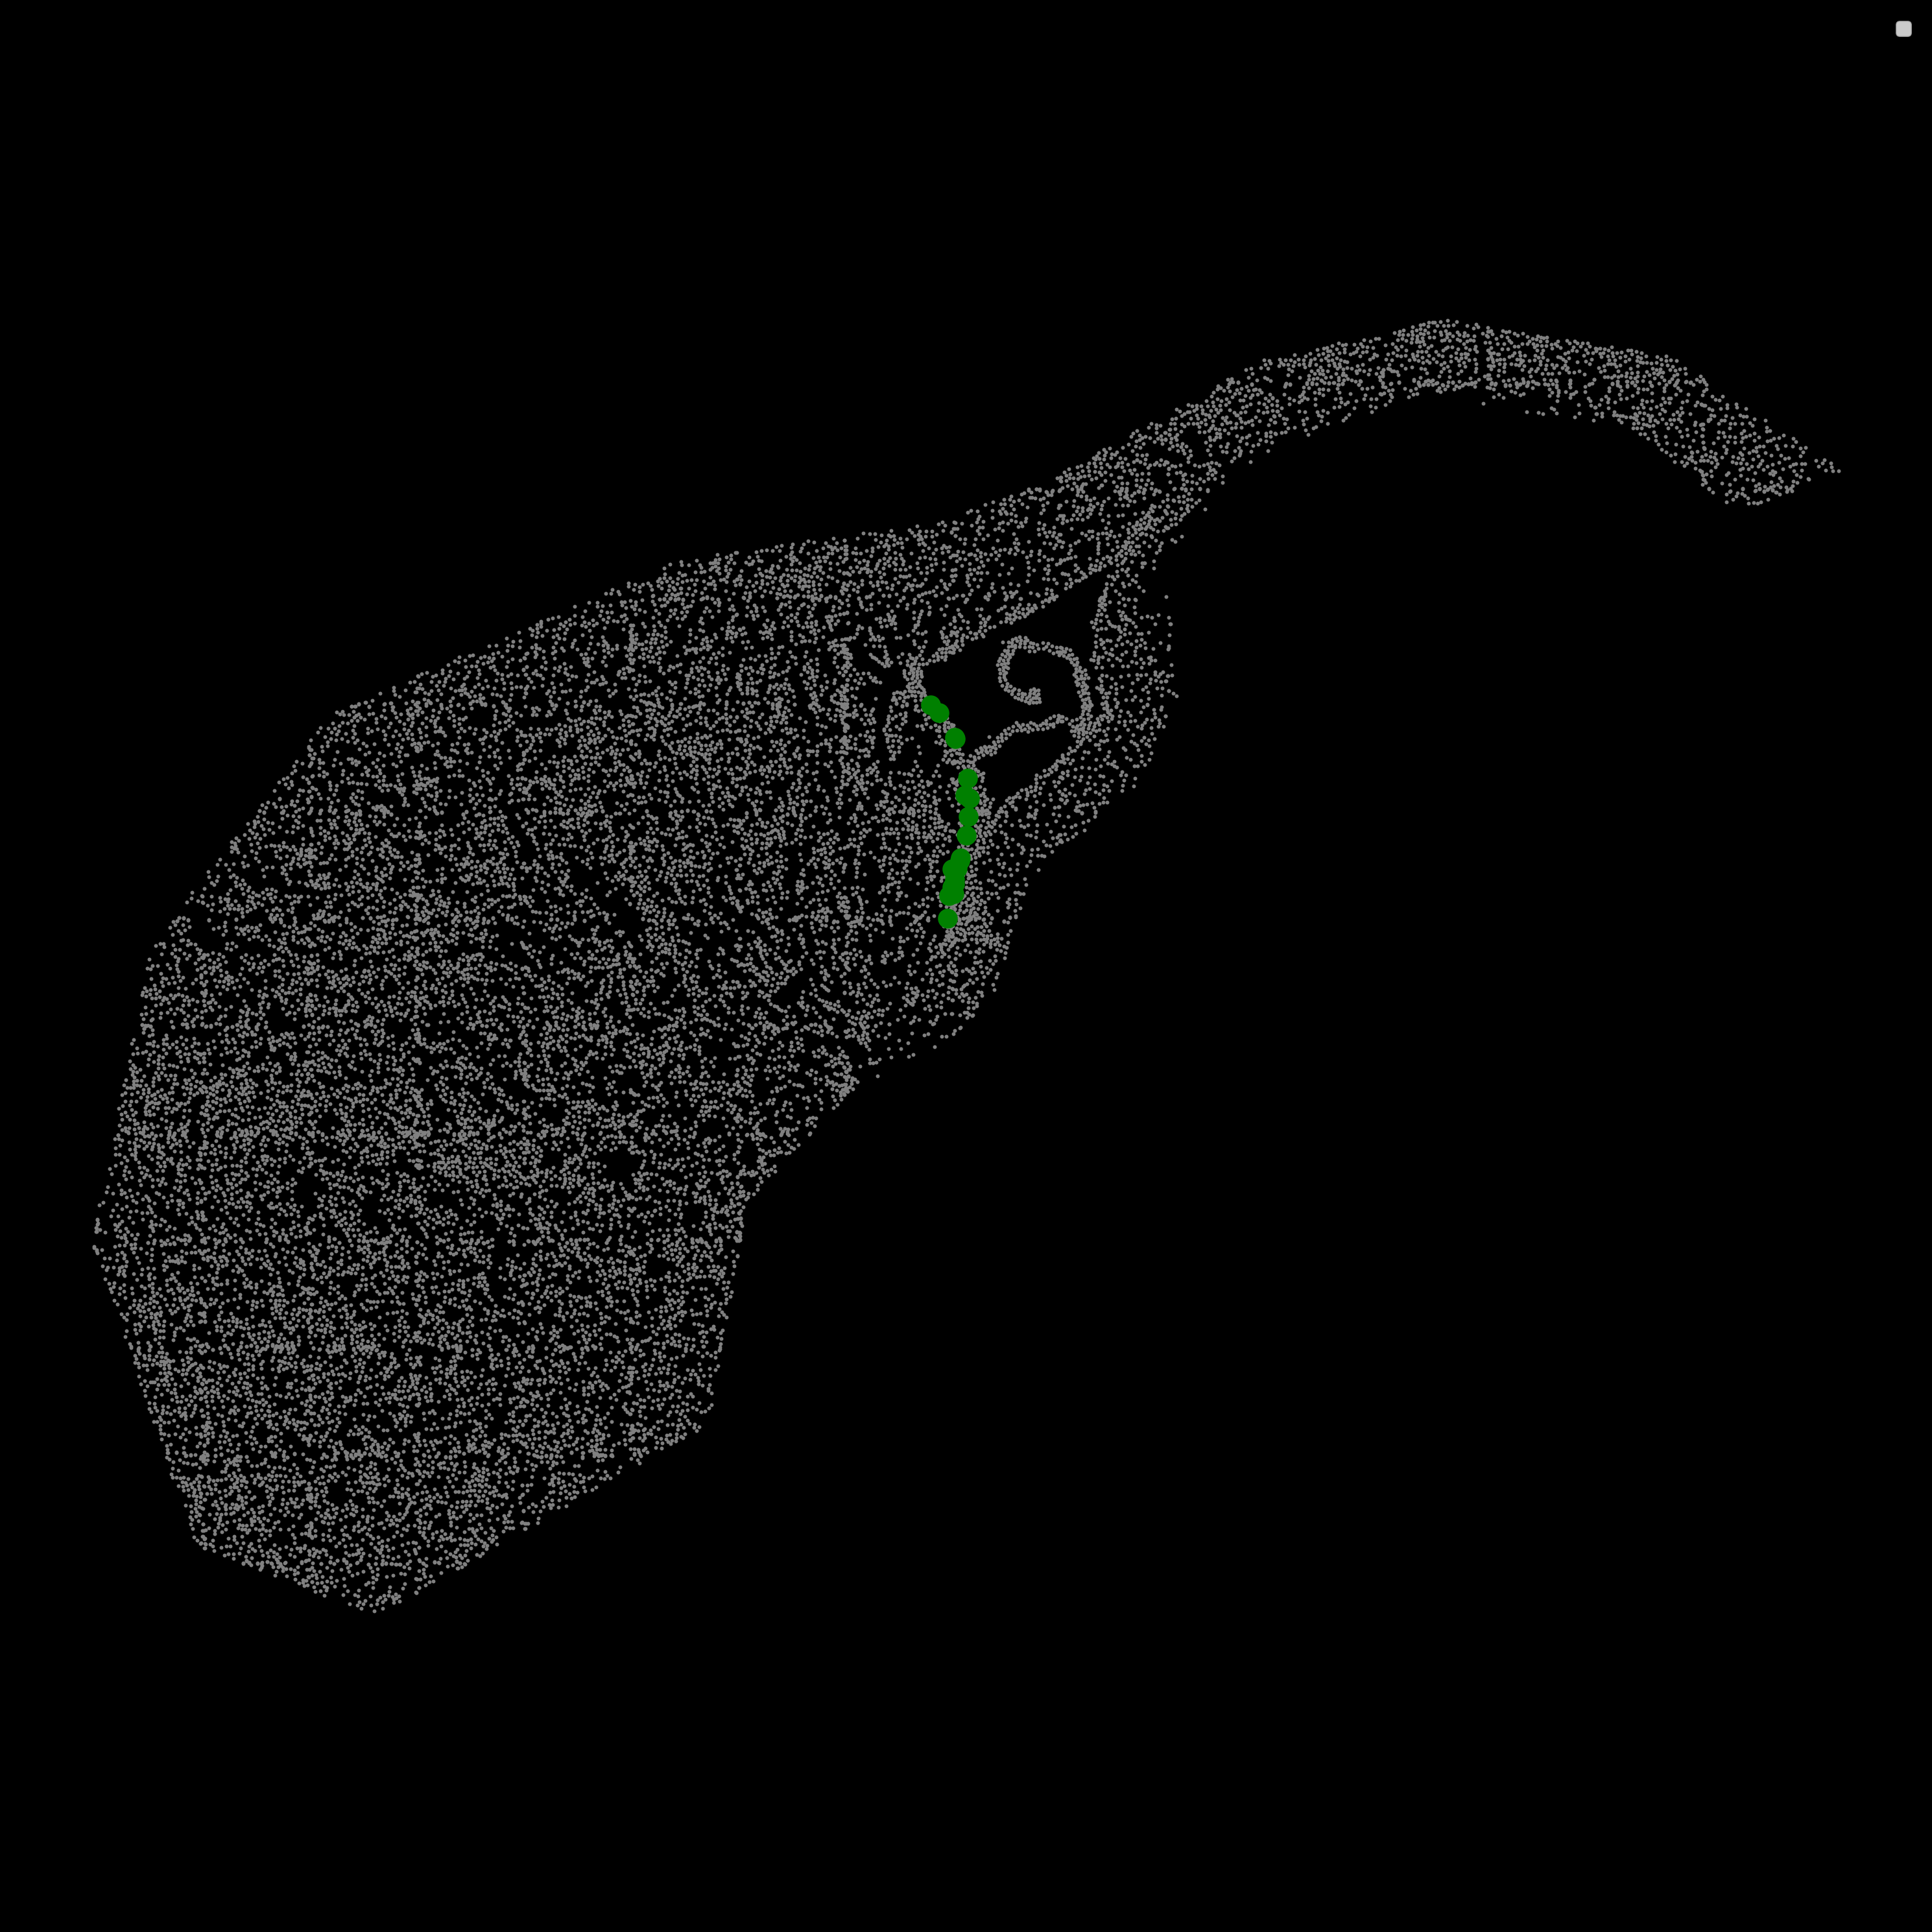

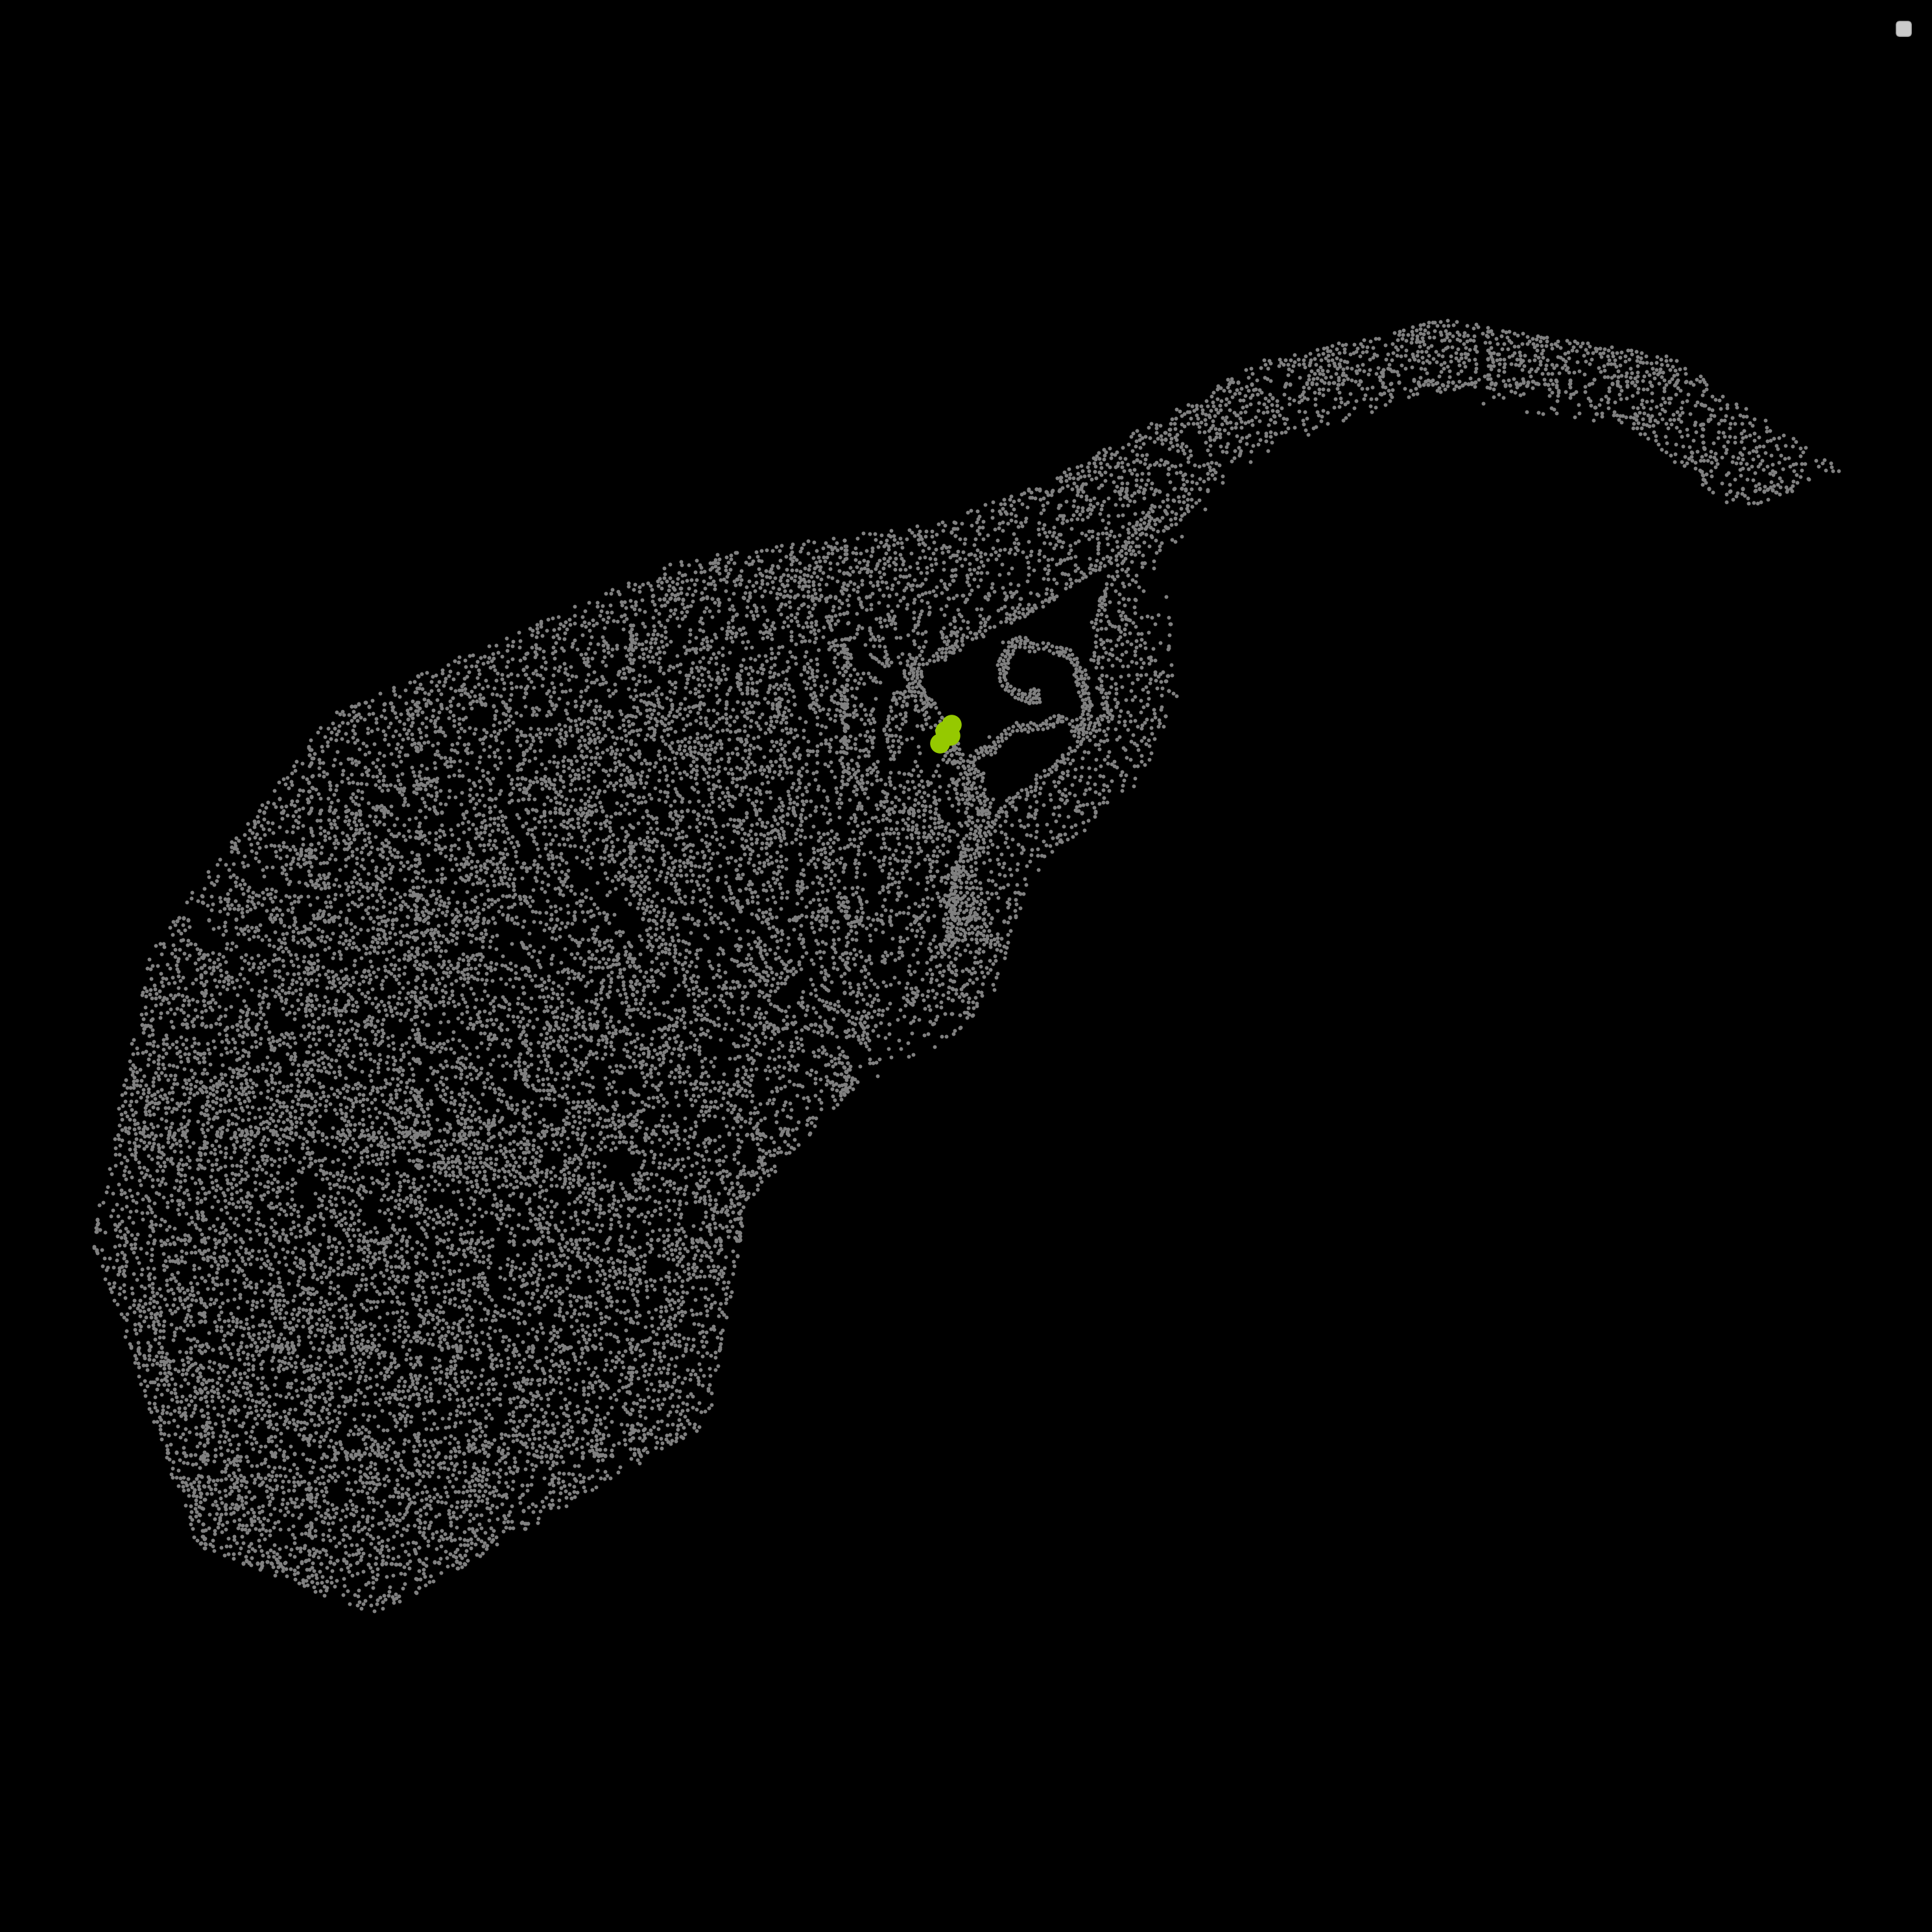

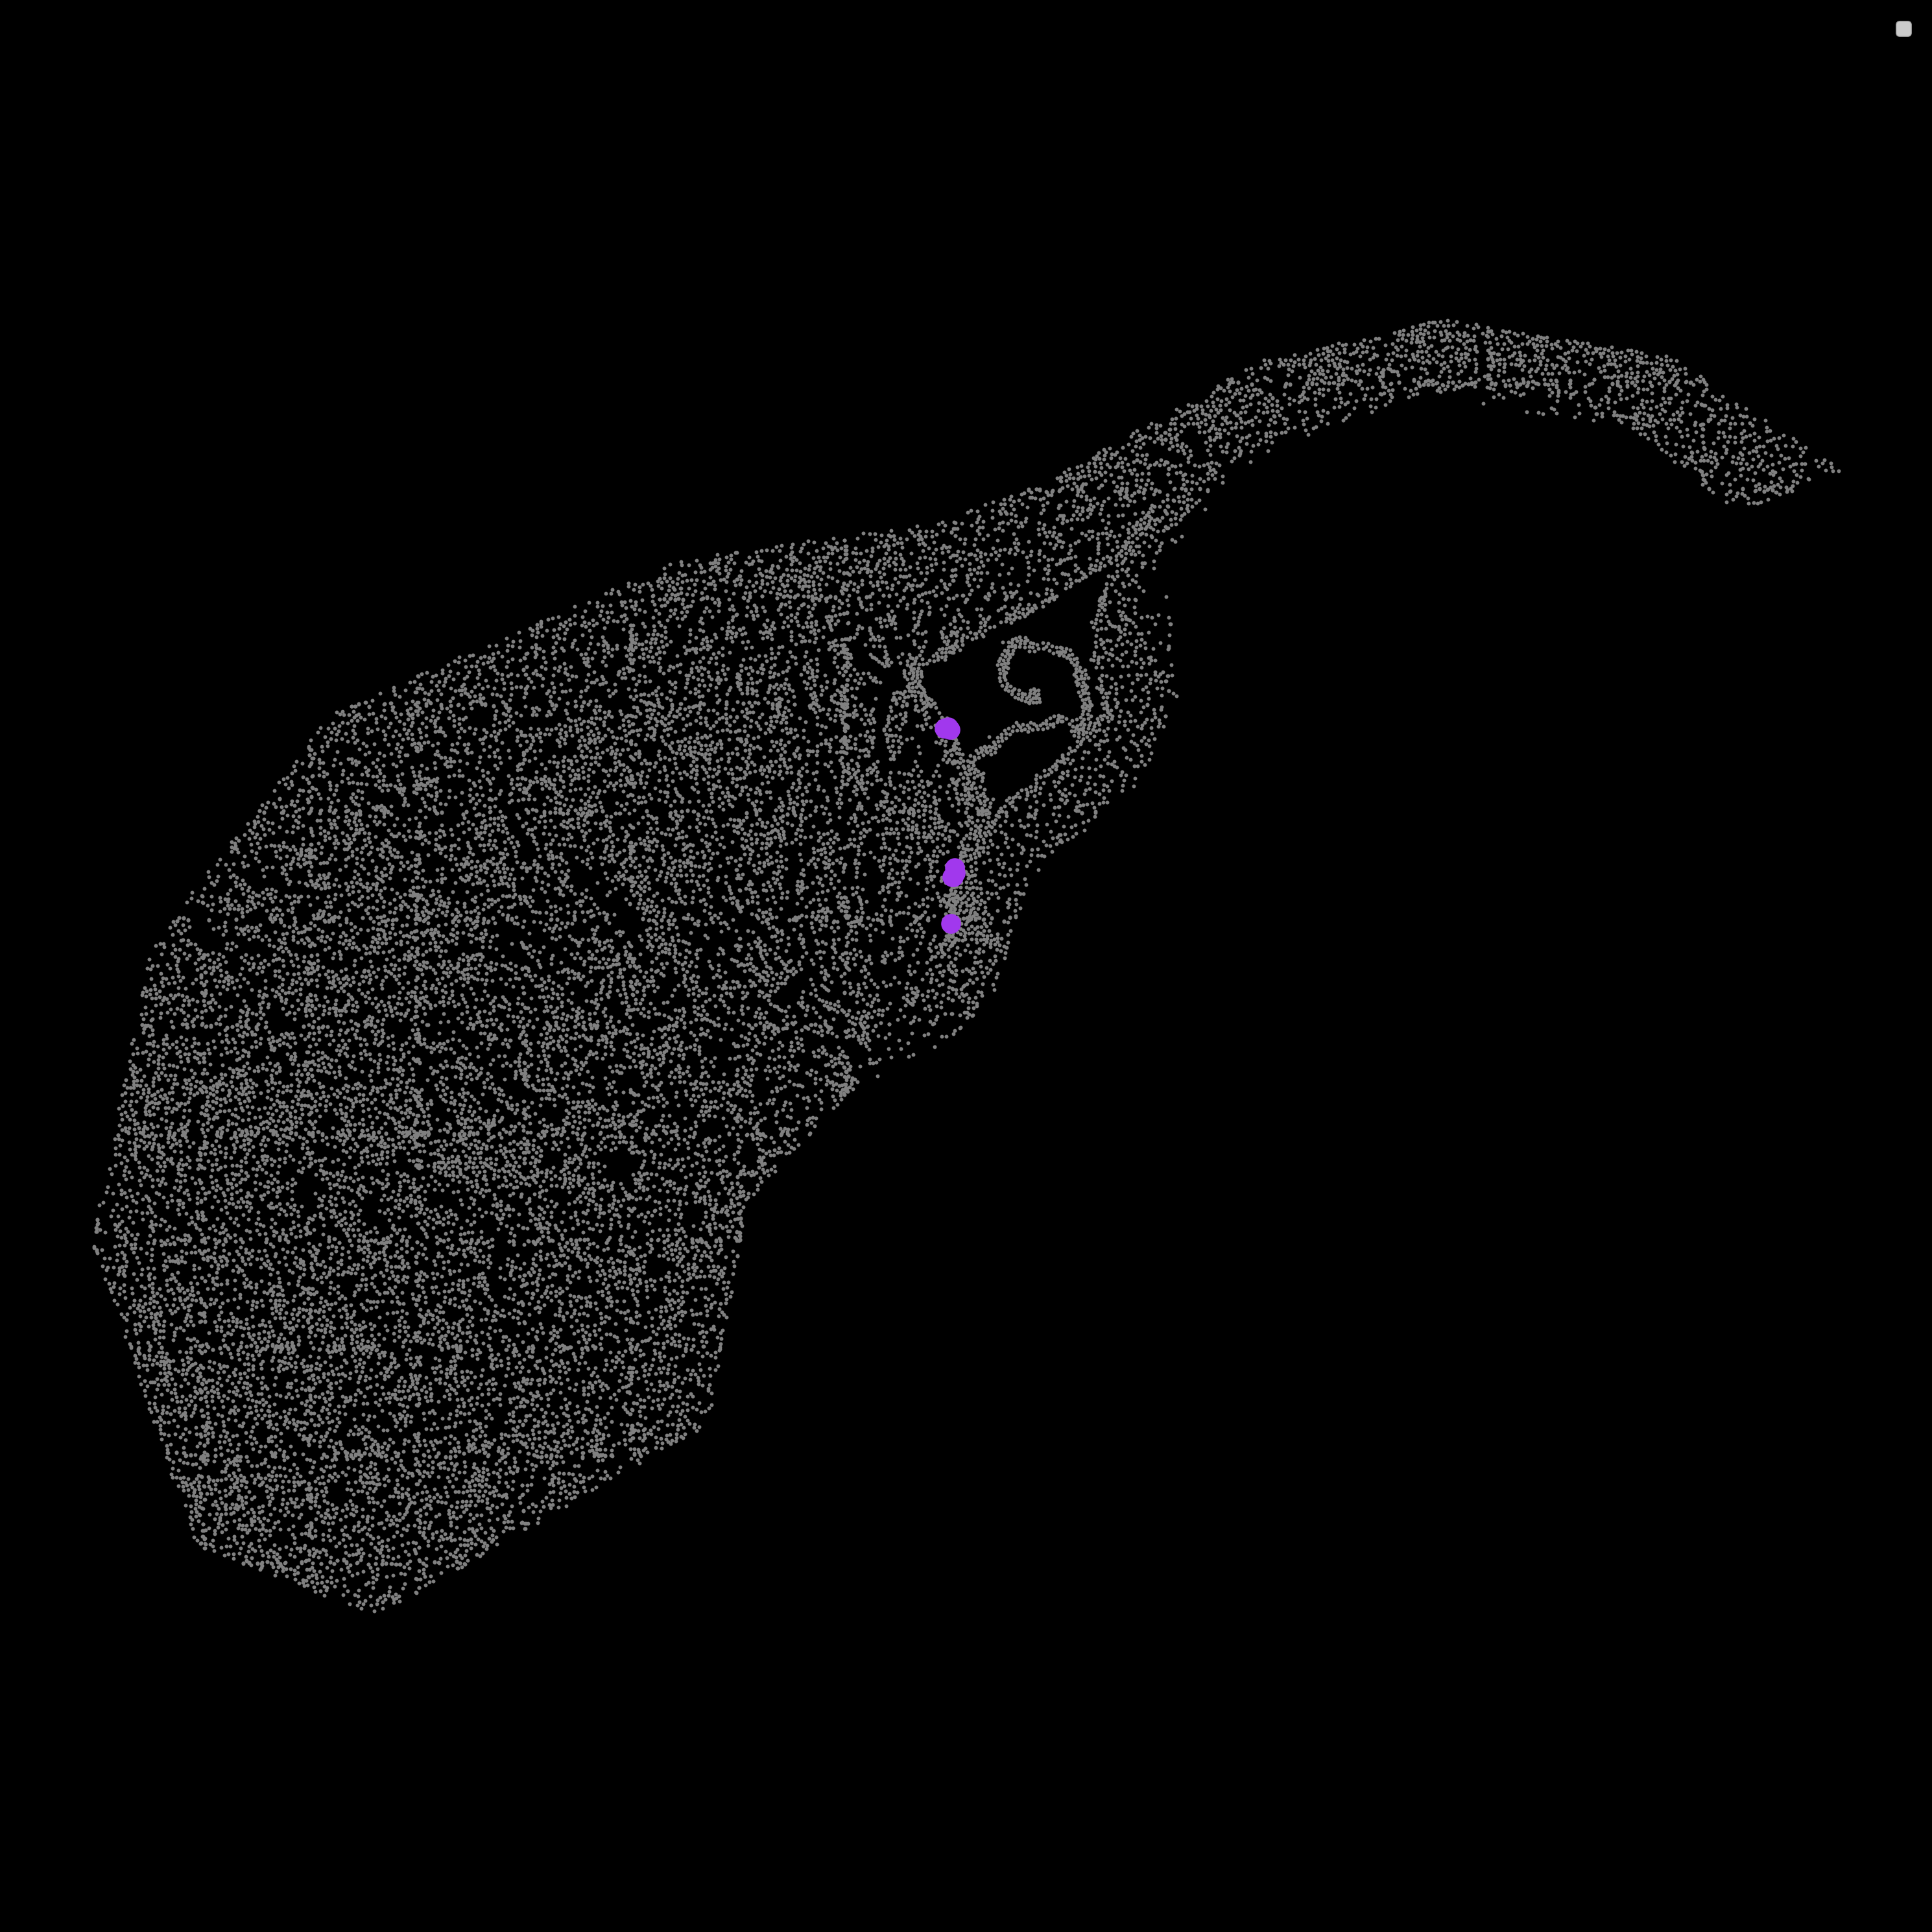

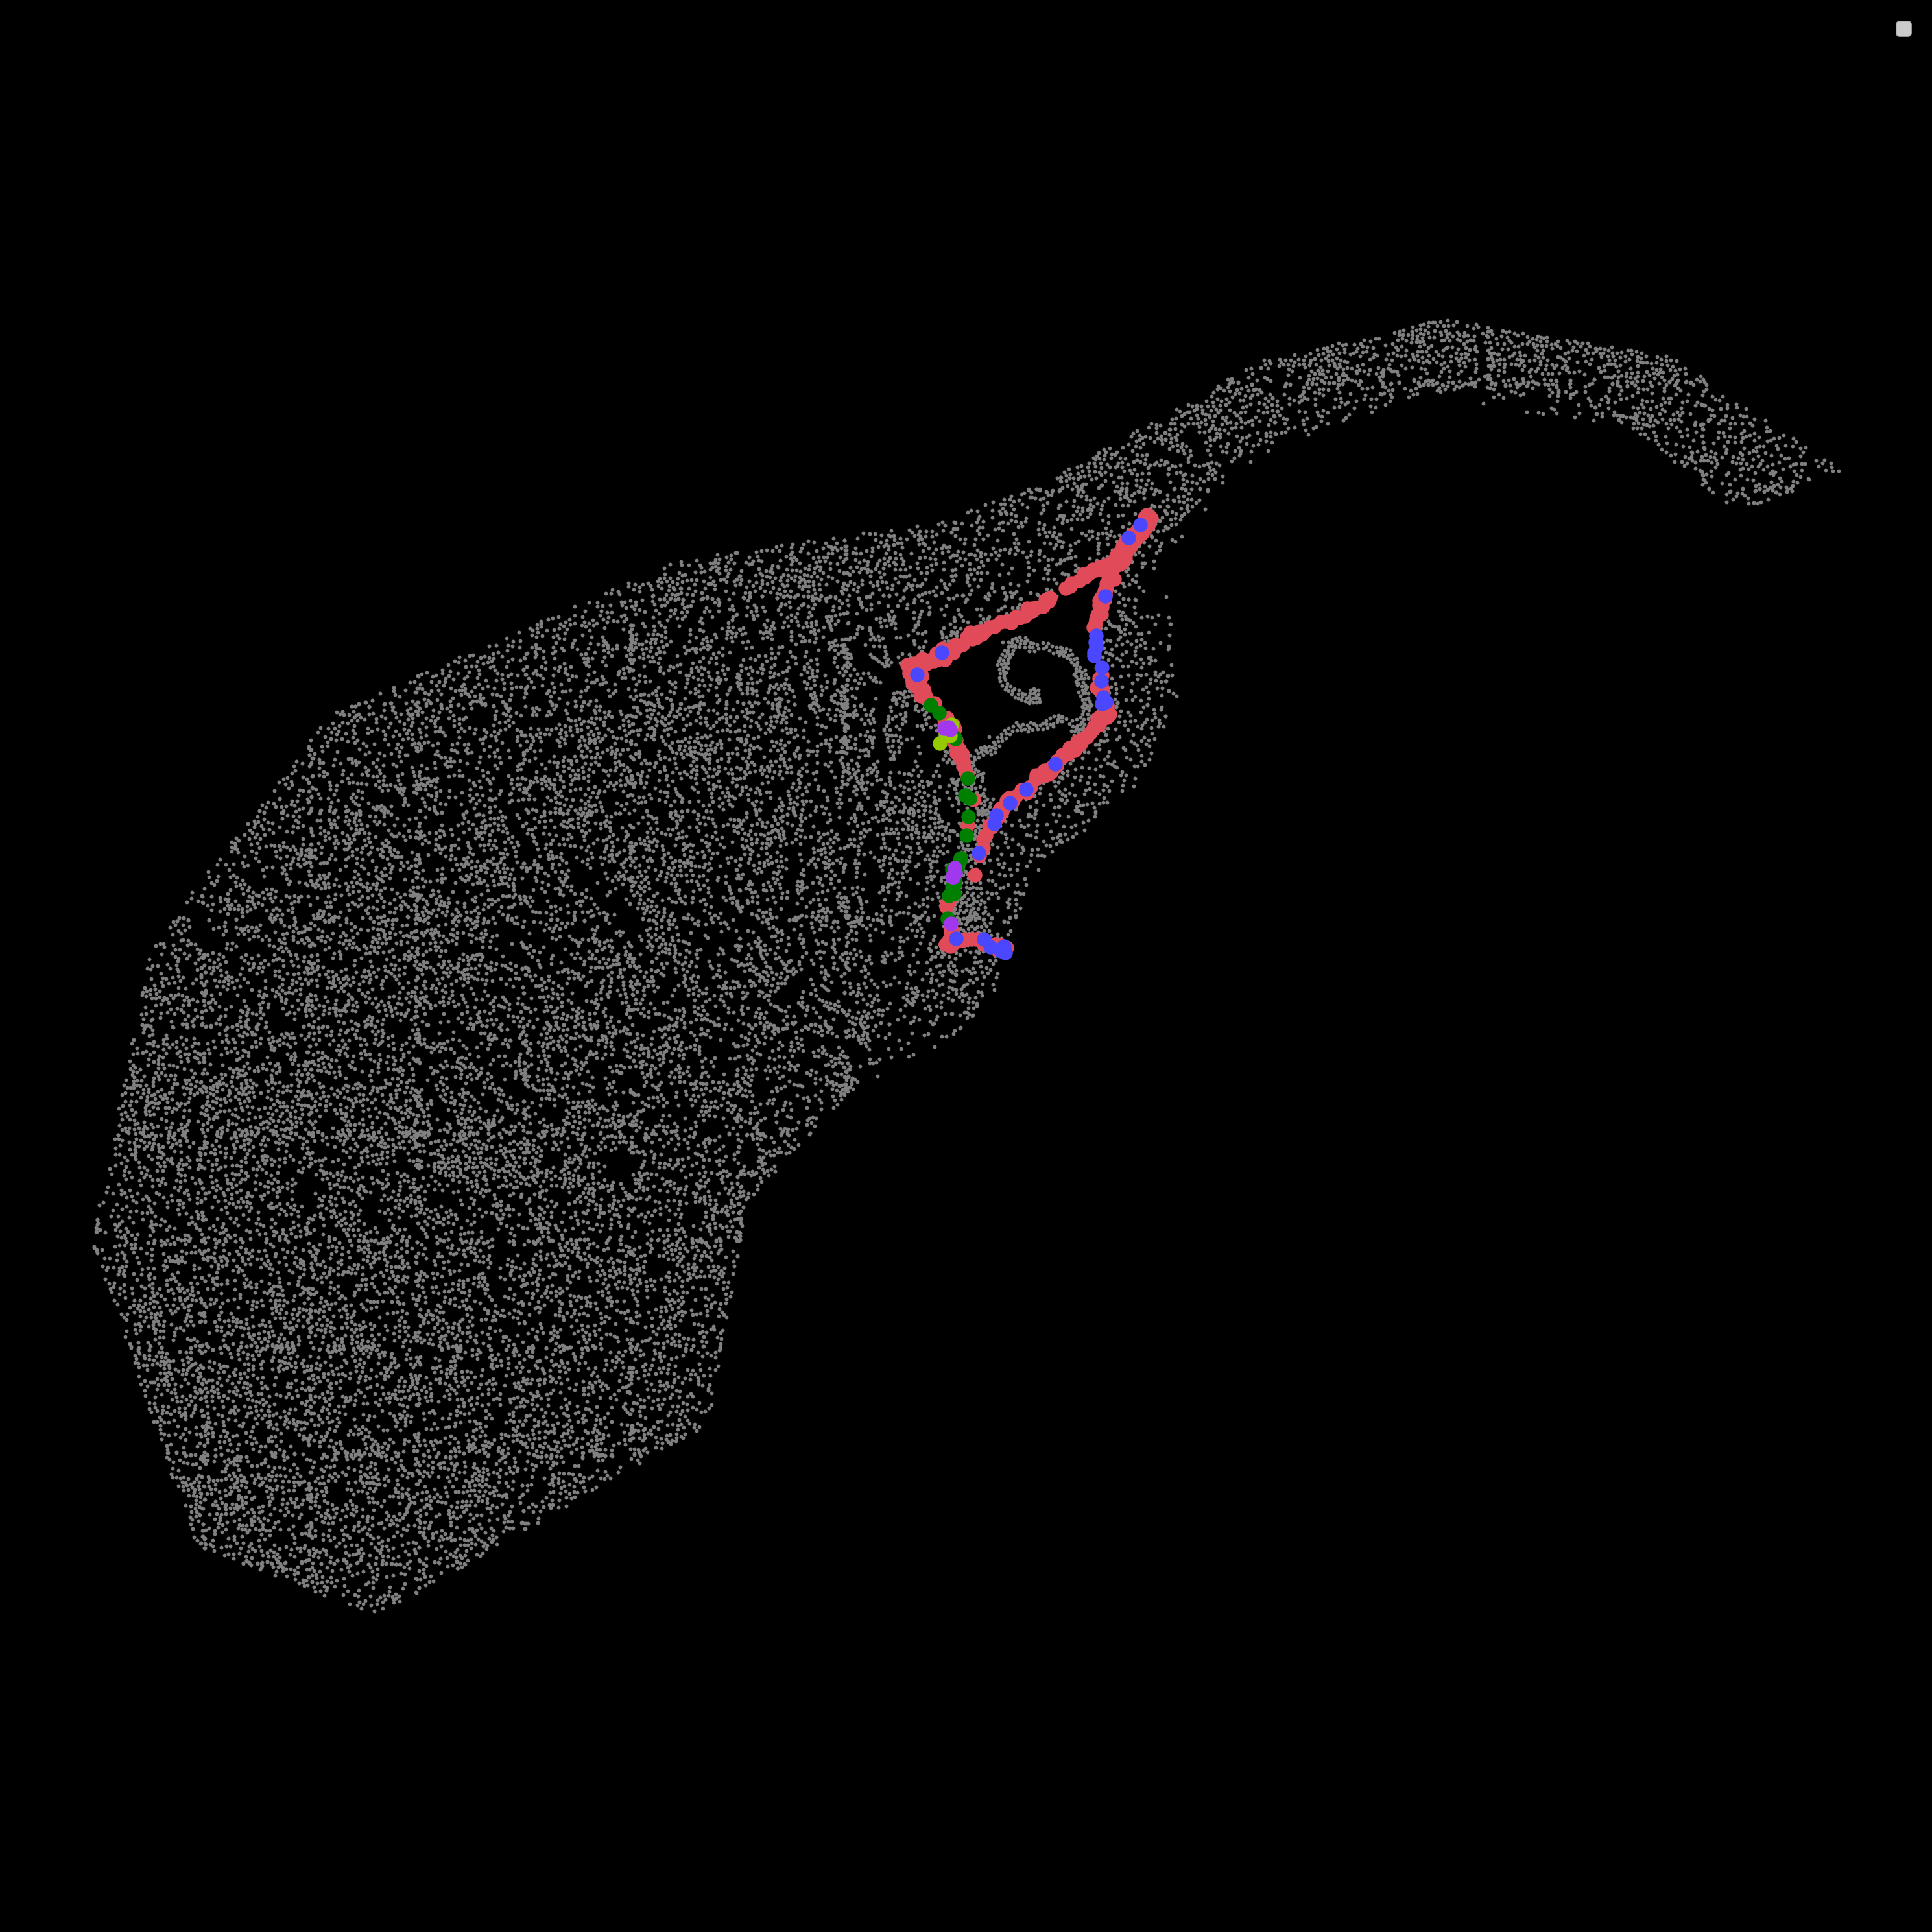

In [49]:
# plot the stages
noninj2j.plot_cluster_scdata("neurogenesis_pathway", clusters=[neu_groups[3]], ref=noninj2, sbig=400)
noninj2j.plot_cluster_scdata("neurogenesis_pathway", clusters=[neu_groups[4]], ref=noninj2, sbig=400)
noninj2j.plot_cluster_scdata("neurogenesis_pathway", clusters=[neu_groups[5]], ref=noninj2, sbig=400)
noninj2j.plot_cluster_scdata("neurogenesis_pathway", clusters=neu_groups[1:-1], ref=noninj2, sbig=200)

/Users/kjenie/DataspellProjects/ptb_timepoints/.conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/kjenie/DataspellProjects/ptb_timepoints/.conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:369: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/Users/kjenie/DataspellProjects/ptb_timepoints/.conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:379: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/Users/kjenie/DataspellProjects/ptb_timepoints/.conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


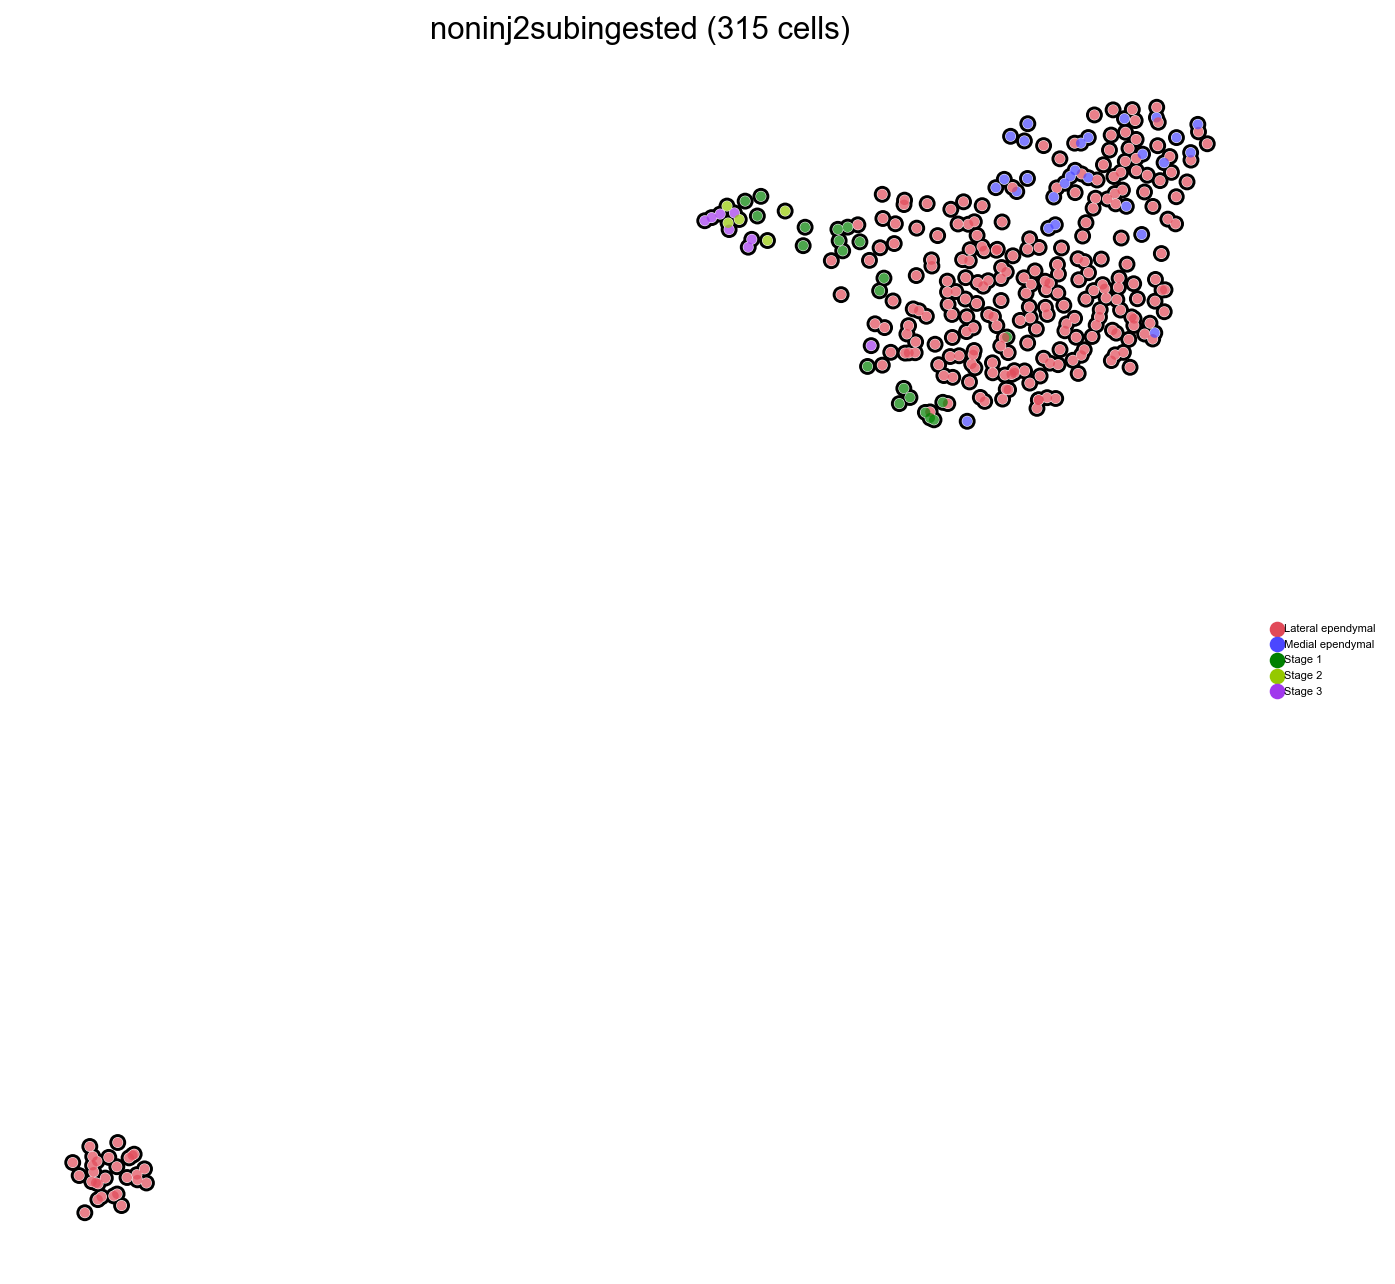

In [50]:
# reumap the subset of the svz pathway

noinj2sub = noninj2j.get_cluster(neu_groups[1:-1], "neurogenesis_pathway")
noninj2subj = Jenie(noinj2sub, "noninj2subingested", "noninj2subingested", "neurogenesis_pathway")
noninj2subj.reprocess()
noninj2subj.umap("neurogenesis_pathway", fig=(10,10), size=80, legend="right margin")

### Ingest treatment sample to svz neurogenesis pathway

In [51]:
# read ptb data
ptb22 = sc.read("../DataF/fig5/adatasvz_neuro_noastro_ptb_injected_4_18_iset2.h5ad")

In [52]:
# ingest to svz reference
d = ptb22

vars1 = list(d.var.index)
vars2 = list(ref.var.index)
varsf = np.intersect1d(vars1,vars2)
print("Genes in common:",len(varsf))
d = d[:,varsf]
ref2 = ref[:,varsf]
sc.pp.pca(d,n_comps=50)
sc.pp.pca(ref2,n_comps=50)
sc.tl.ingest(d,ref2,obs='neurogenesis_pathway')



Genes in common: 275
h3
Distances type: <class 'scipy.sparse._csr.csr_matrix'>


h1


### Plot svz neurogenesis pathway of ingested treatment data

In [53]:
ptb22j = Jenie(d, "ptb22ingested", "ptb22ingested", "neurogenesis_pathway")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


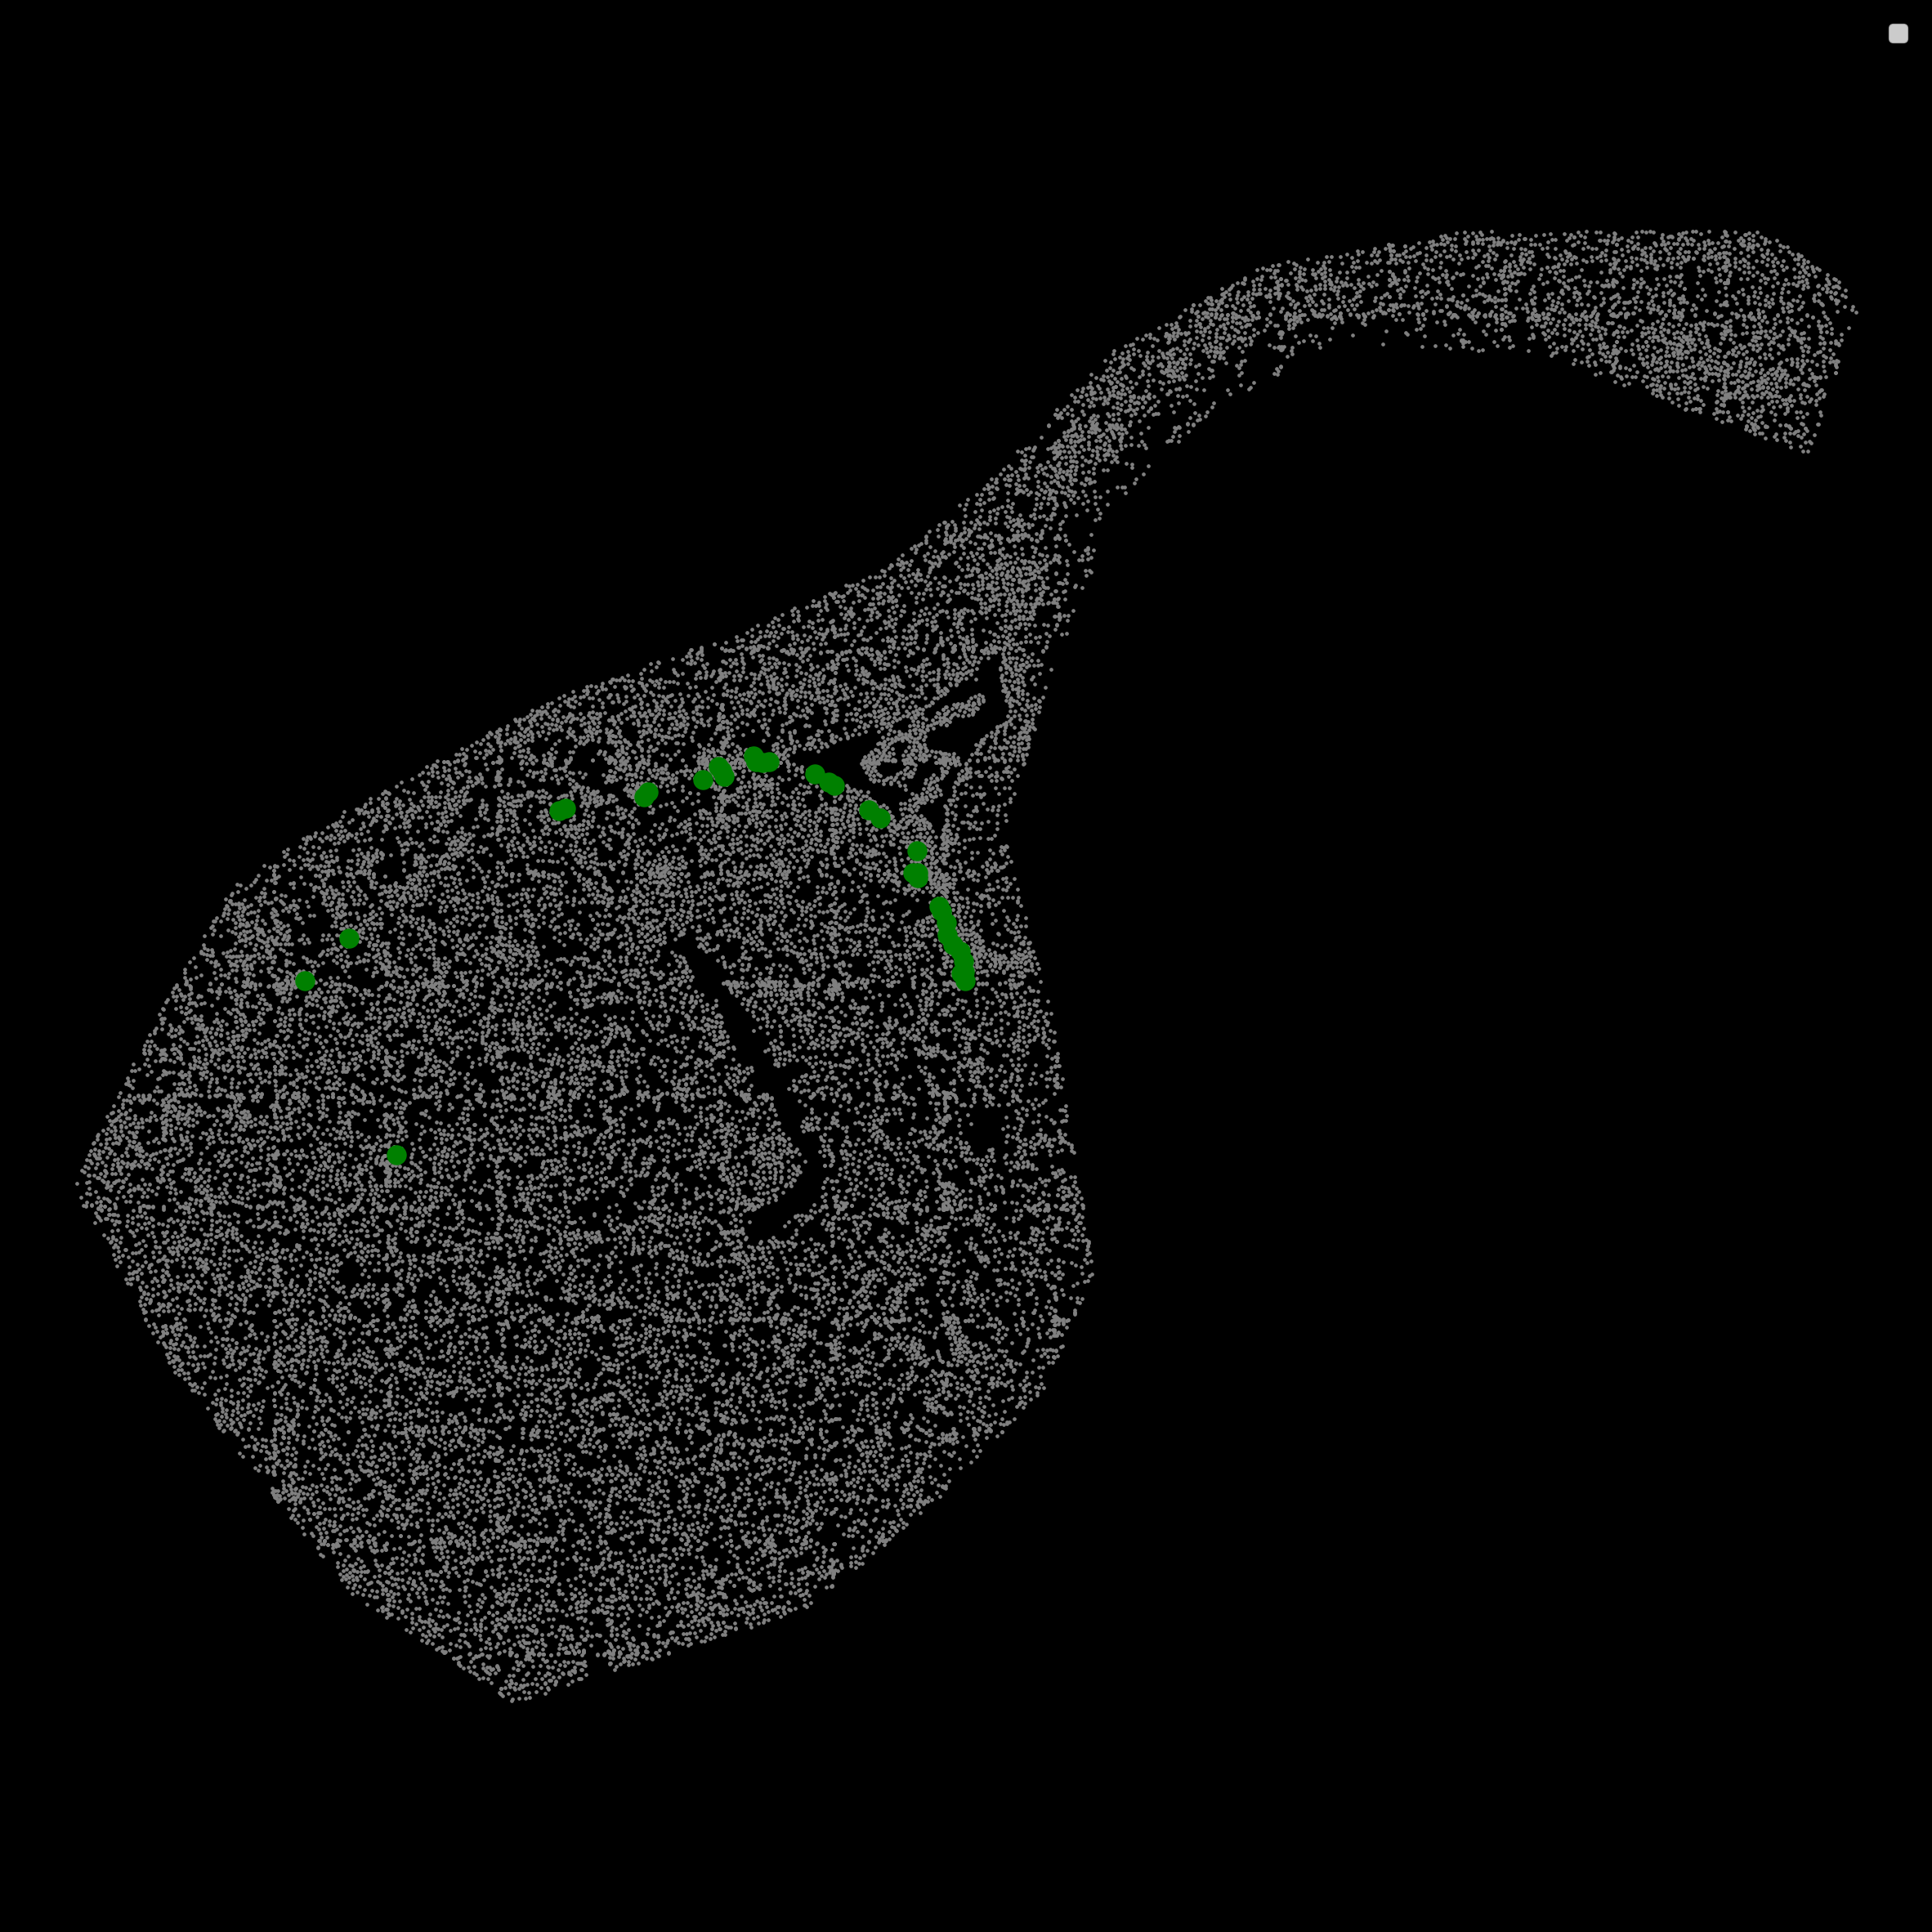

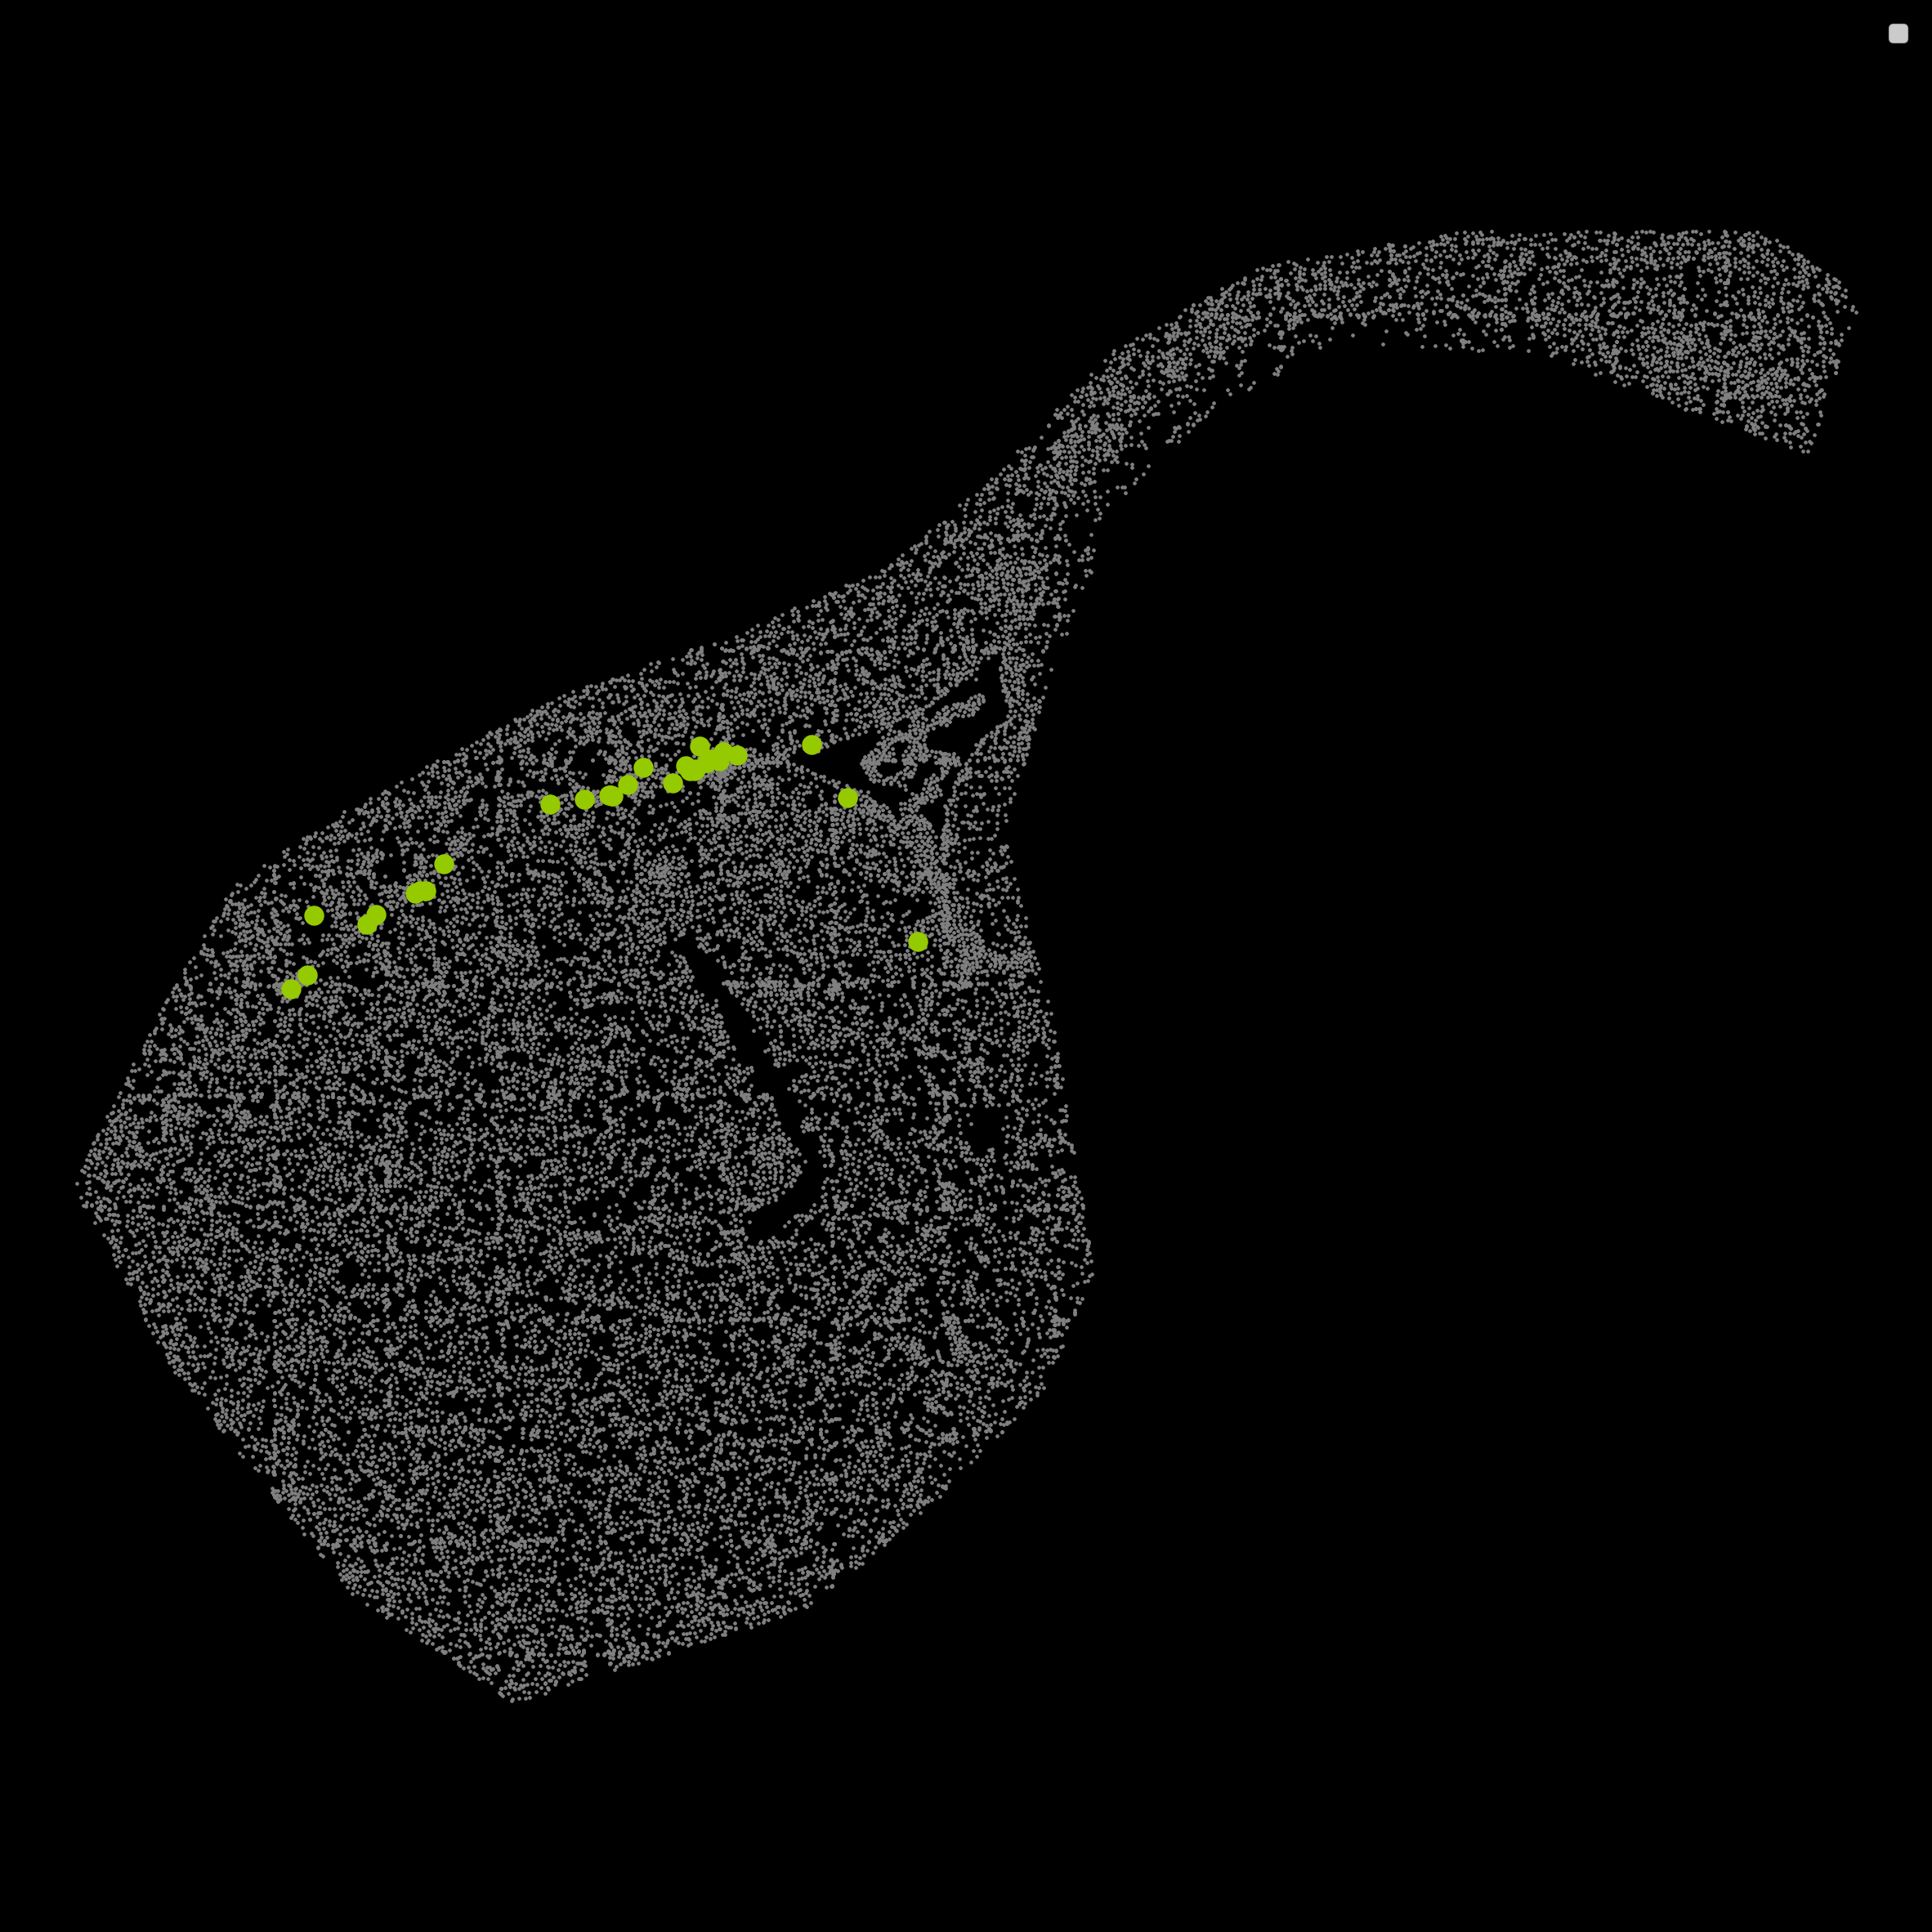

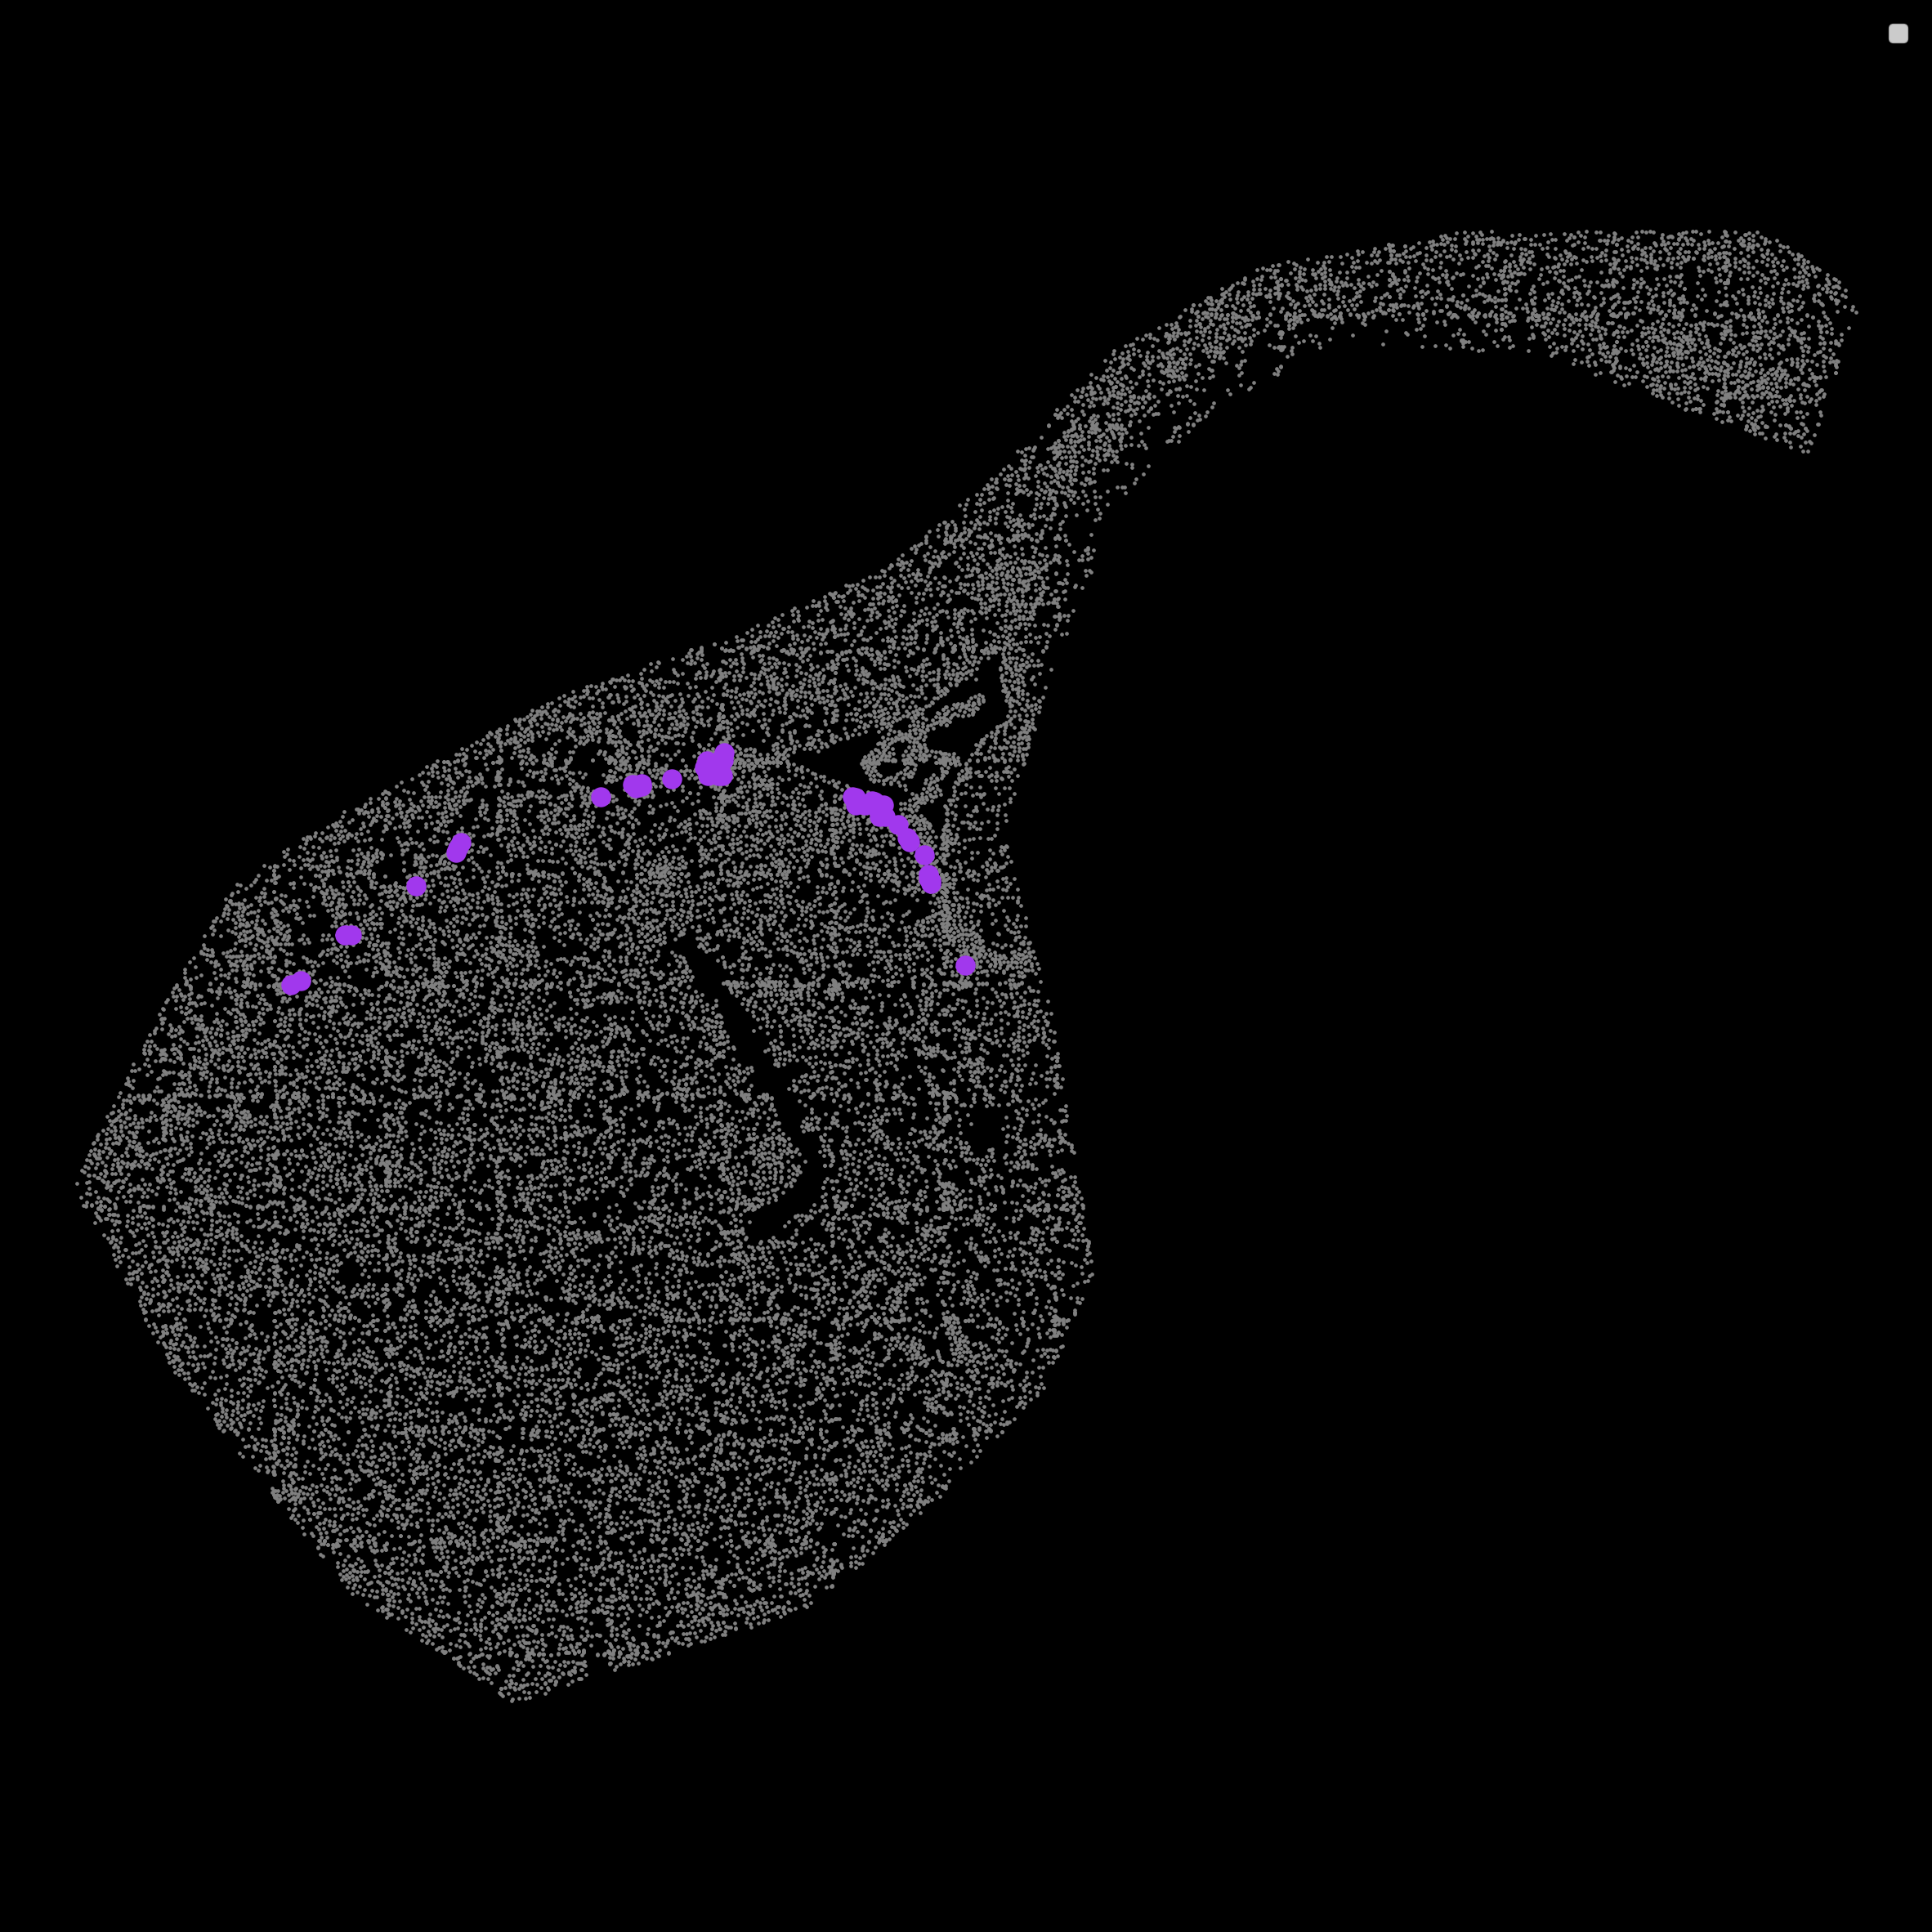

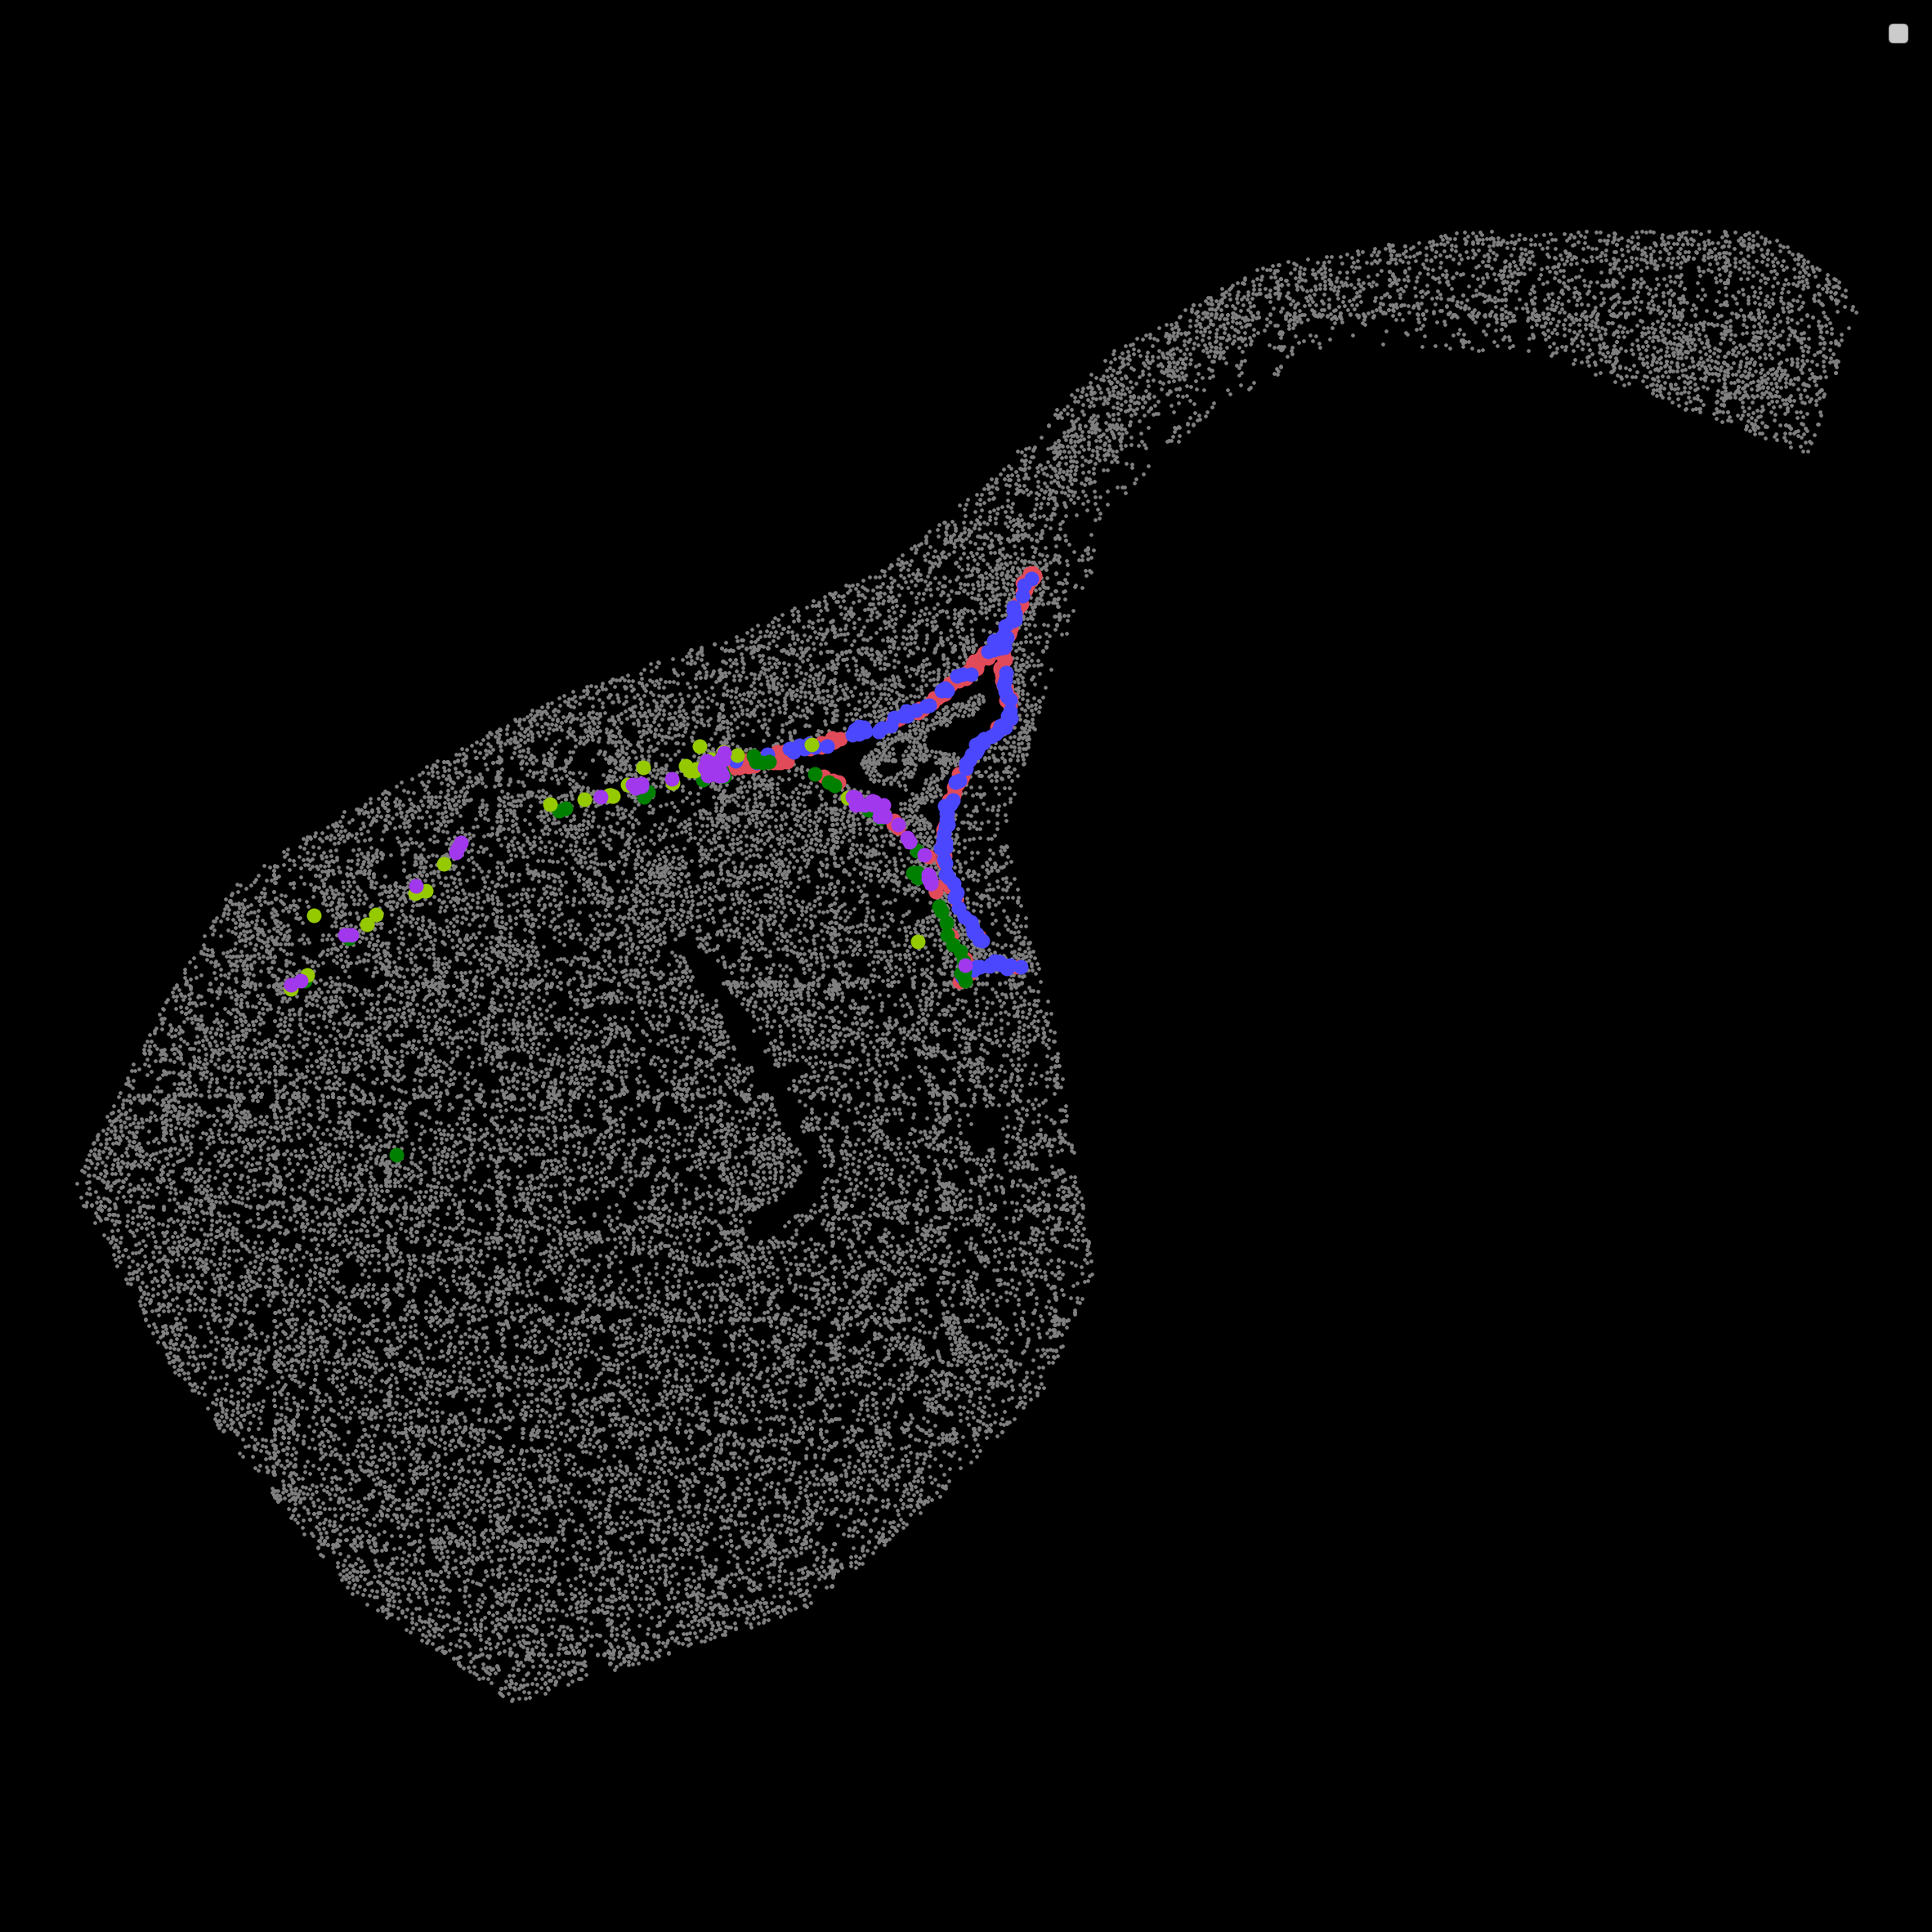

In [54]:
# plot the stages
ptb22j.plot_cluster_scdata("neurogenesis_pathway", clusters=[neu_groups[3]], ref=ptb22, sbig=400)
ptb22j.plot_cluster_scdata("neurogenesis_pathway", clusters=[neu_groups[4]], ref=ptb22, sbig=400)
ptb22j.plot_cluster_scdata("neurogenesis_pathway", clusters=[neu_groups[5]], ref=ptb22, sbig=400)
ptb22j.plot_cluster_scdata("neurogenesis_pathway", clusters=neu_groups[1:-1], ref=ptb22, sbig=200)

/Users/kjenie/DataspellProjects/ptb_timepoints/.conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/kjenie/DataspellProjects/ptb_timepoints/.conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:369: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/Users/kjenie/DataspellProjects/ptb_timepoints/.conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:379: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/Users/kjenie/DataspellProjects/ptb_timepoints/.conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


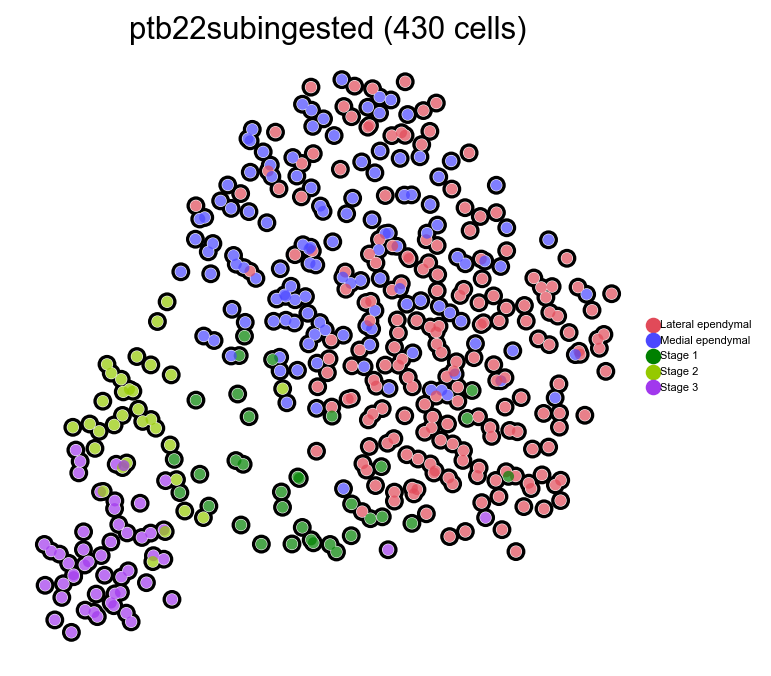

In [55]:
# reumap the subset of the svz pathway
ptb22sub = ptb22j.get_cluster(neu_groups[1:-1], "neurogenesis_pathway")
ptb22subj = Jenie(ptb22sub, "ptb22subingested", "ptb22subingested", "neurogenesis_pathway")
ptb22subj.reprocess()
ptb22subj.umap("neurogenesis_pathway", fig=(5,5), size=100, legend="right margin")

# Figure C

PCA plot of SVZ-Stage 1 cells from 1 year old control and PTBP1-ASO injected mice and the genes along the axes.

### Ingest different control and treatment data to reference

In [56]:
ref = sc.read("../DataF/fig5/final_reference_4week_svz.h5ad")

In [57]:
c5sal1 = sc.read("../DataF/fig5/cbm5/saline1_cbm5_cut.h5ad")

d = c5sal1

vars1 = list(d.var.index)
vars2 = list(ref.var.index)
varsf = np.intersect1d(vars1,vars2)
print("Genes in common:",len(varsf))
d = d[:,varsf]
ref2 = ref[:,varsf]
sc.pp.pca(d,n_comps=50)
sc.pp.pca(ref2,n_comps=50)
sc.tl.ingest(d,ref2,obs='neurogenesis_pathway')

c5sal1ing = d.copy()

Genes in common: 216
h3
Distances type: <class 'scipy.sparse._csr.csr_matrix'>


h1


In [58]:
c5sal2 = sc.read("../DataF/fig5/cbm5/saline2_cbm5_cut.h5ad")

d = c5sal2

vars1 = list(d.var.index)
vars2 = list(ref.var.index)
varsf = np.intersect1d(vars1,vars2)
print("Genes in common:",len(varsf))
d = d[:,varsf]
ref2 = ref[:,varsf]
sc.pp.pca(d,n_comps=50)
sc.pp.pca(ref2,n_comps=50)
sc.tl.ingest(d,ref2,obs='neurogenesis_pathway')

c5sal2ing = d.copy()

Genes in common: 216
h3
Distances type: <class 'scipy.sparse._csr.csr_matrix'>


h1


In [59]:
c5ptb1 = sc.read("../DataF/fig5/cbm5/ptb1_cbm5_cut.h5ad")

d = c5ptb1

vars1 = list(d.var.index)
vars2 = list(ref.var.index)
varsf = np.intersect1d(vars1,vars2)
print("Genes in common:",len(varsf))
d = d[:,varsf]
ref2 = ref[:,varsf]
sc.pp.pca(d,n_comps=50)
sc.pp.pca(ref2,n_comps=50)
sc.tl.ingest(d,ref2,obs='neurogenesis_pathway')

c5ptb1ing = d.copy()

Genes in common: 216
h3
Distances type: <class 'scipy.sparse._csr.csr_matrix'>


h1


In [60]:
c5ptb2 = sc.read("../DataF/fig5/cbm5/ptb2_cbm5_cut.h5ad")

d = c5ptb2

vars1 = list(d.var.index)
vars2 = list(ref.var.index)
varsf = np.intersect1d(vars1,vars2)
print("Genes in common:",len(varsf))
d = d[:,varsf]
ref2 = ref[:,varsf]
sc.pp.pca(d,n_comps=50)
sc.pp.pca(ref2,n_comps=50)
sc.tl.ingest(d,ref2,obs='neurogenesis_pathway')

c5ptb2ing = d.copy()

Genes in common: 216
h3
Distances type: <class 'scipy.sparse._csr.csr_matrix'>


h1


### PCA on stage 1 cells

/var/folders/j6/2g6n5jcx4dz5dncsnj0mt2p40000gn/T/ipykernel_56088/4254496897.py:8: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  subc5sal1ing.obs["treatment"] = "c5sal1ing"
/var/folders/j6/2g6n5jcx4dz5dncsnj0mt2p40000gn/T/ipykernel_56088/4254496897.py:9: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  subc5sal2ing.obs["treatment"] = "c5sal2ing"
/var/folders/j6/2g6n5jcx4dz5dncsnj0mt2p40000gn/T/ipykernel_56088/4254496897.py:10: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  subc5ptb1ing.obs["treatment"] = "c5ptb1ing"
/var/folders/j6/2g6n5jcx4dz5dncsnj0mt2p40000gn/T/ipykernel_56088/4254496897.py:11: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  subc5ptb2ing.obs["treatment"] = "c5ptb2ing"
/Users/kjenie/DataspellProjects/ptb_timepoints/.conda/lib/python3.10/site-packages

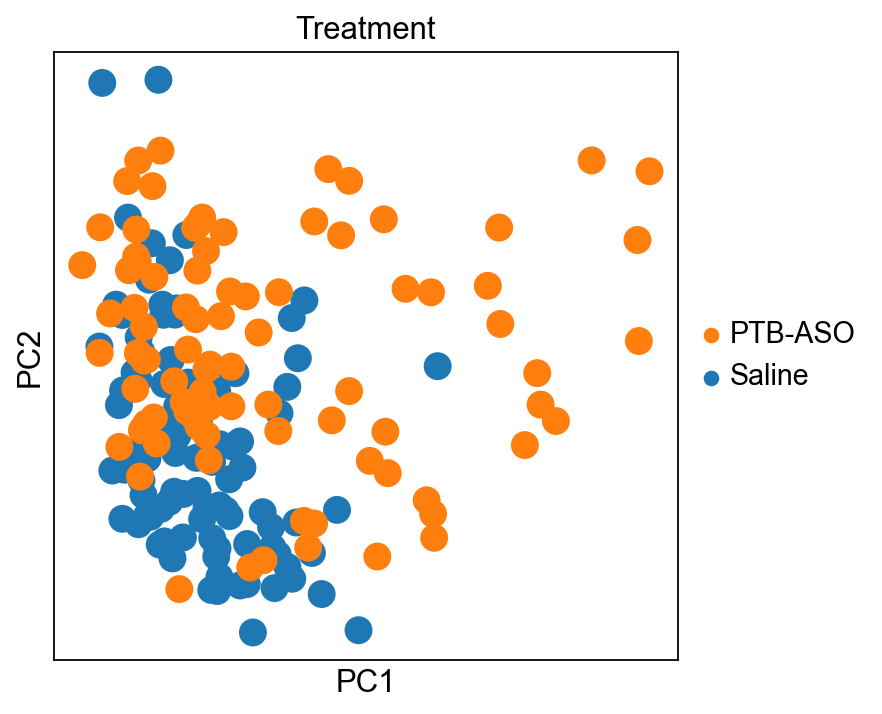

/Users/kjenie/DataspellProjects/ptb_timepoints/.conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8942 (\N{VERTICAL ELLIPSIS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


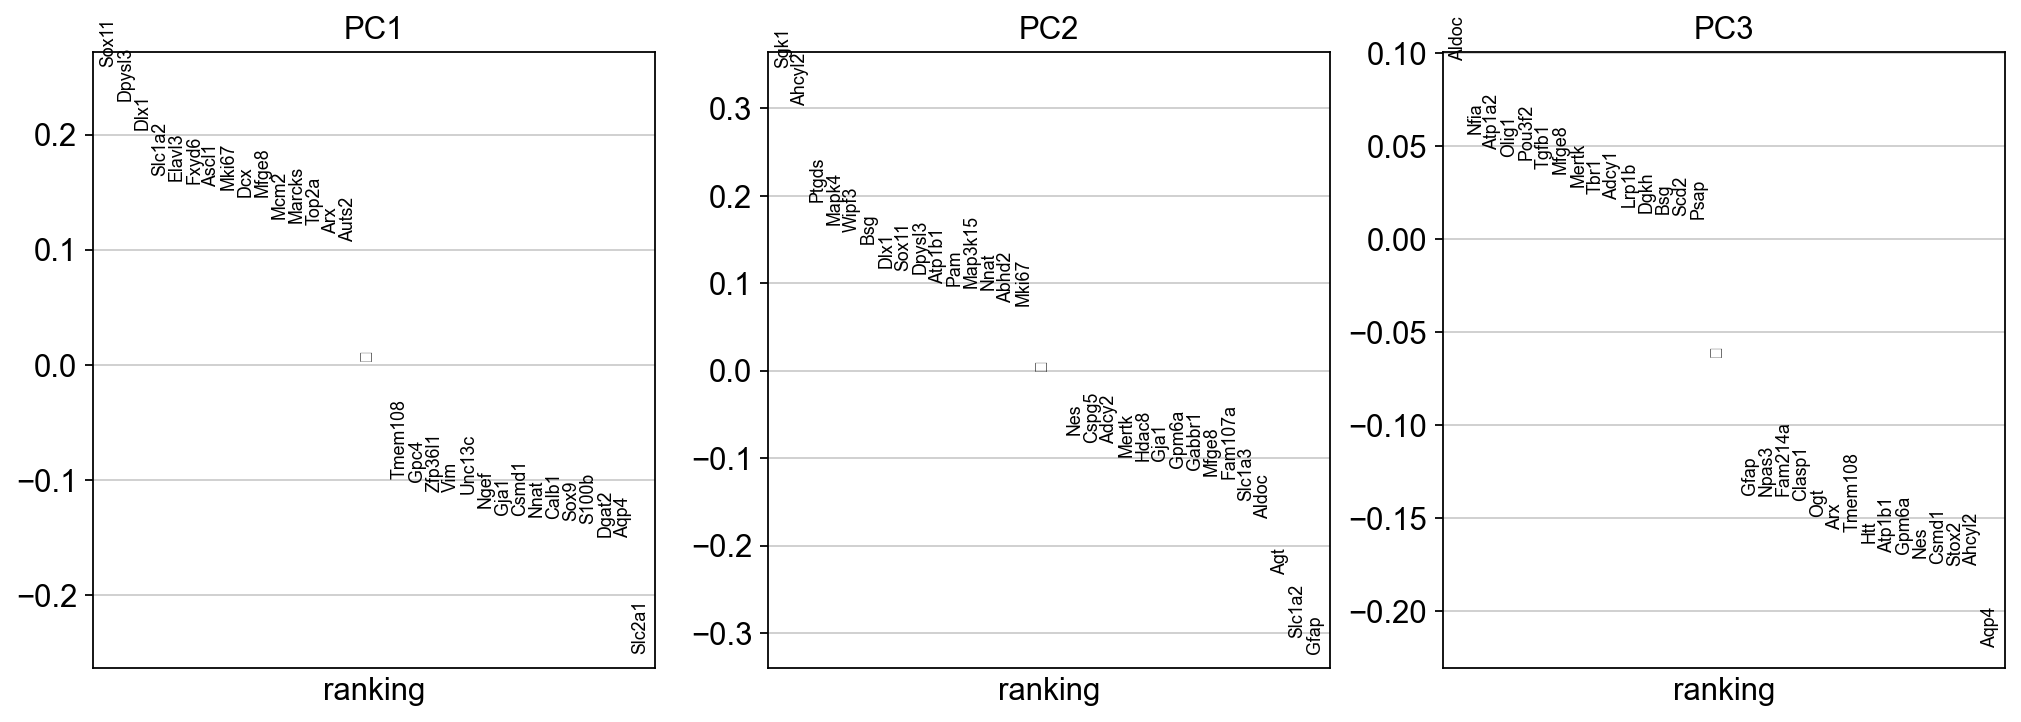

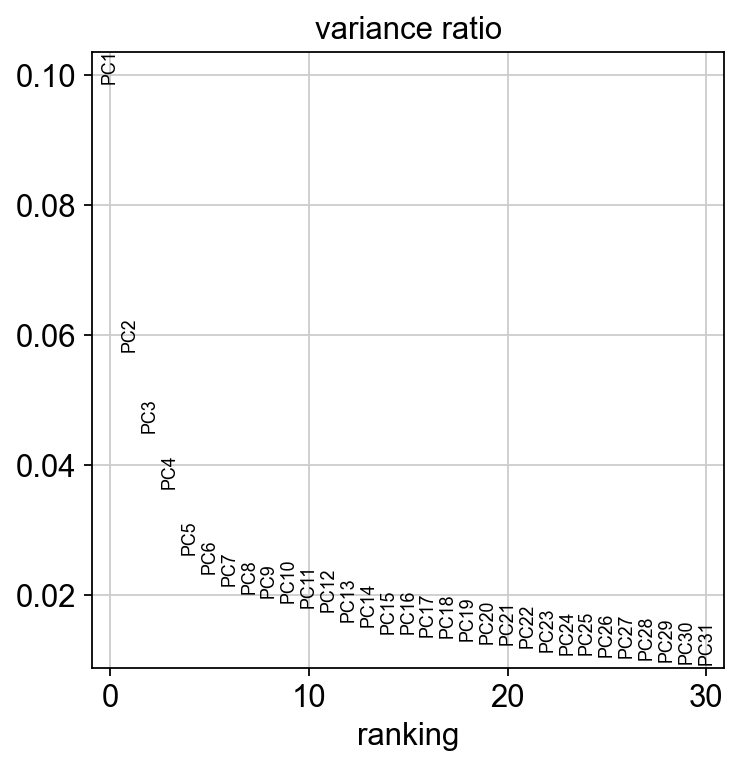

In [61]:
# subset neurogenesis pathway
subc5sal1ing = c5sal1ing[c5sal1ing.obs["neurogenesis_pathway"].isin(neu_groups)]
subc5sal2ing = c5sal2ing[c5sal2ing.obs["neurogenesis_pathway"].isin(neu_groups)]
subc5ptb1ing = c5ptb1ing[c5ptb1ing.obs["neurogenesis_pathway"].isin(neu_groups)]
subc5ptb2ing = c5ptb2ing[c5ptb2ing.obs["neurogenesis_pathway"].isin(neu_groups)]

# add treatment tags
subc5sal1ing.obs["treatment"] = "c5sal1ing"
subc5sal2ing.obs["treatment"] = "c5sal2ing"
subc5ptb1ing.obs["treatment"] = "c5ptb1ing"
subc5ptb2ing.obs["treatment"] = "c5ptb2ing"

# merge files
comsubcbm5 = anndata.concat([subc5sal1ing, subc5sal2ing, subc5ptb1ing, subc5ptb2ing])

# subset stage 1
stage1cbm5 = comsubcbm5[comsubcbm5.obs["neurogenesis_pathway"] == "Stage 1"]

# do stage 1 pca
sc.tl.pca(stage1cbm5)
sc.pl.pca_overview(stage1cbm5, color="Treatment", palette=[ "tab:orange","tab:blue"])

# Figure D

Violin plots of key genes in the two groups in stage 1 cells 

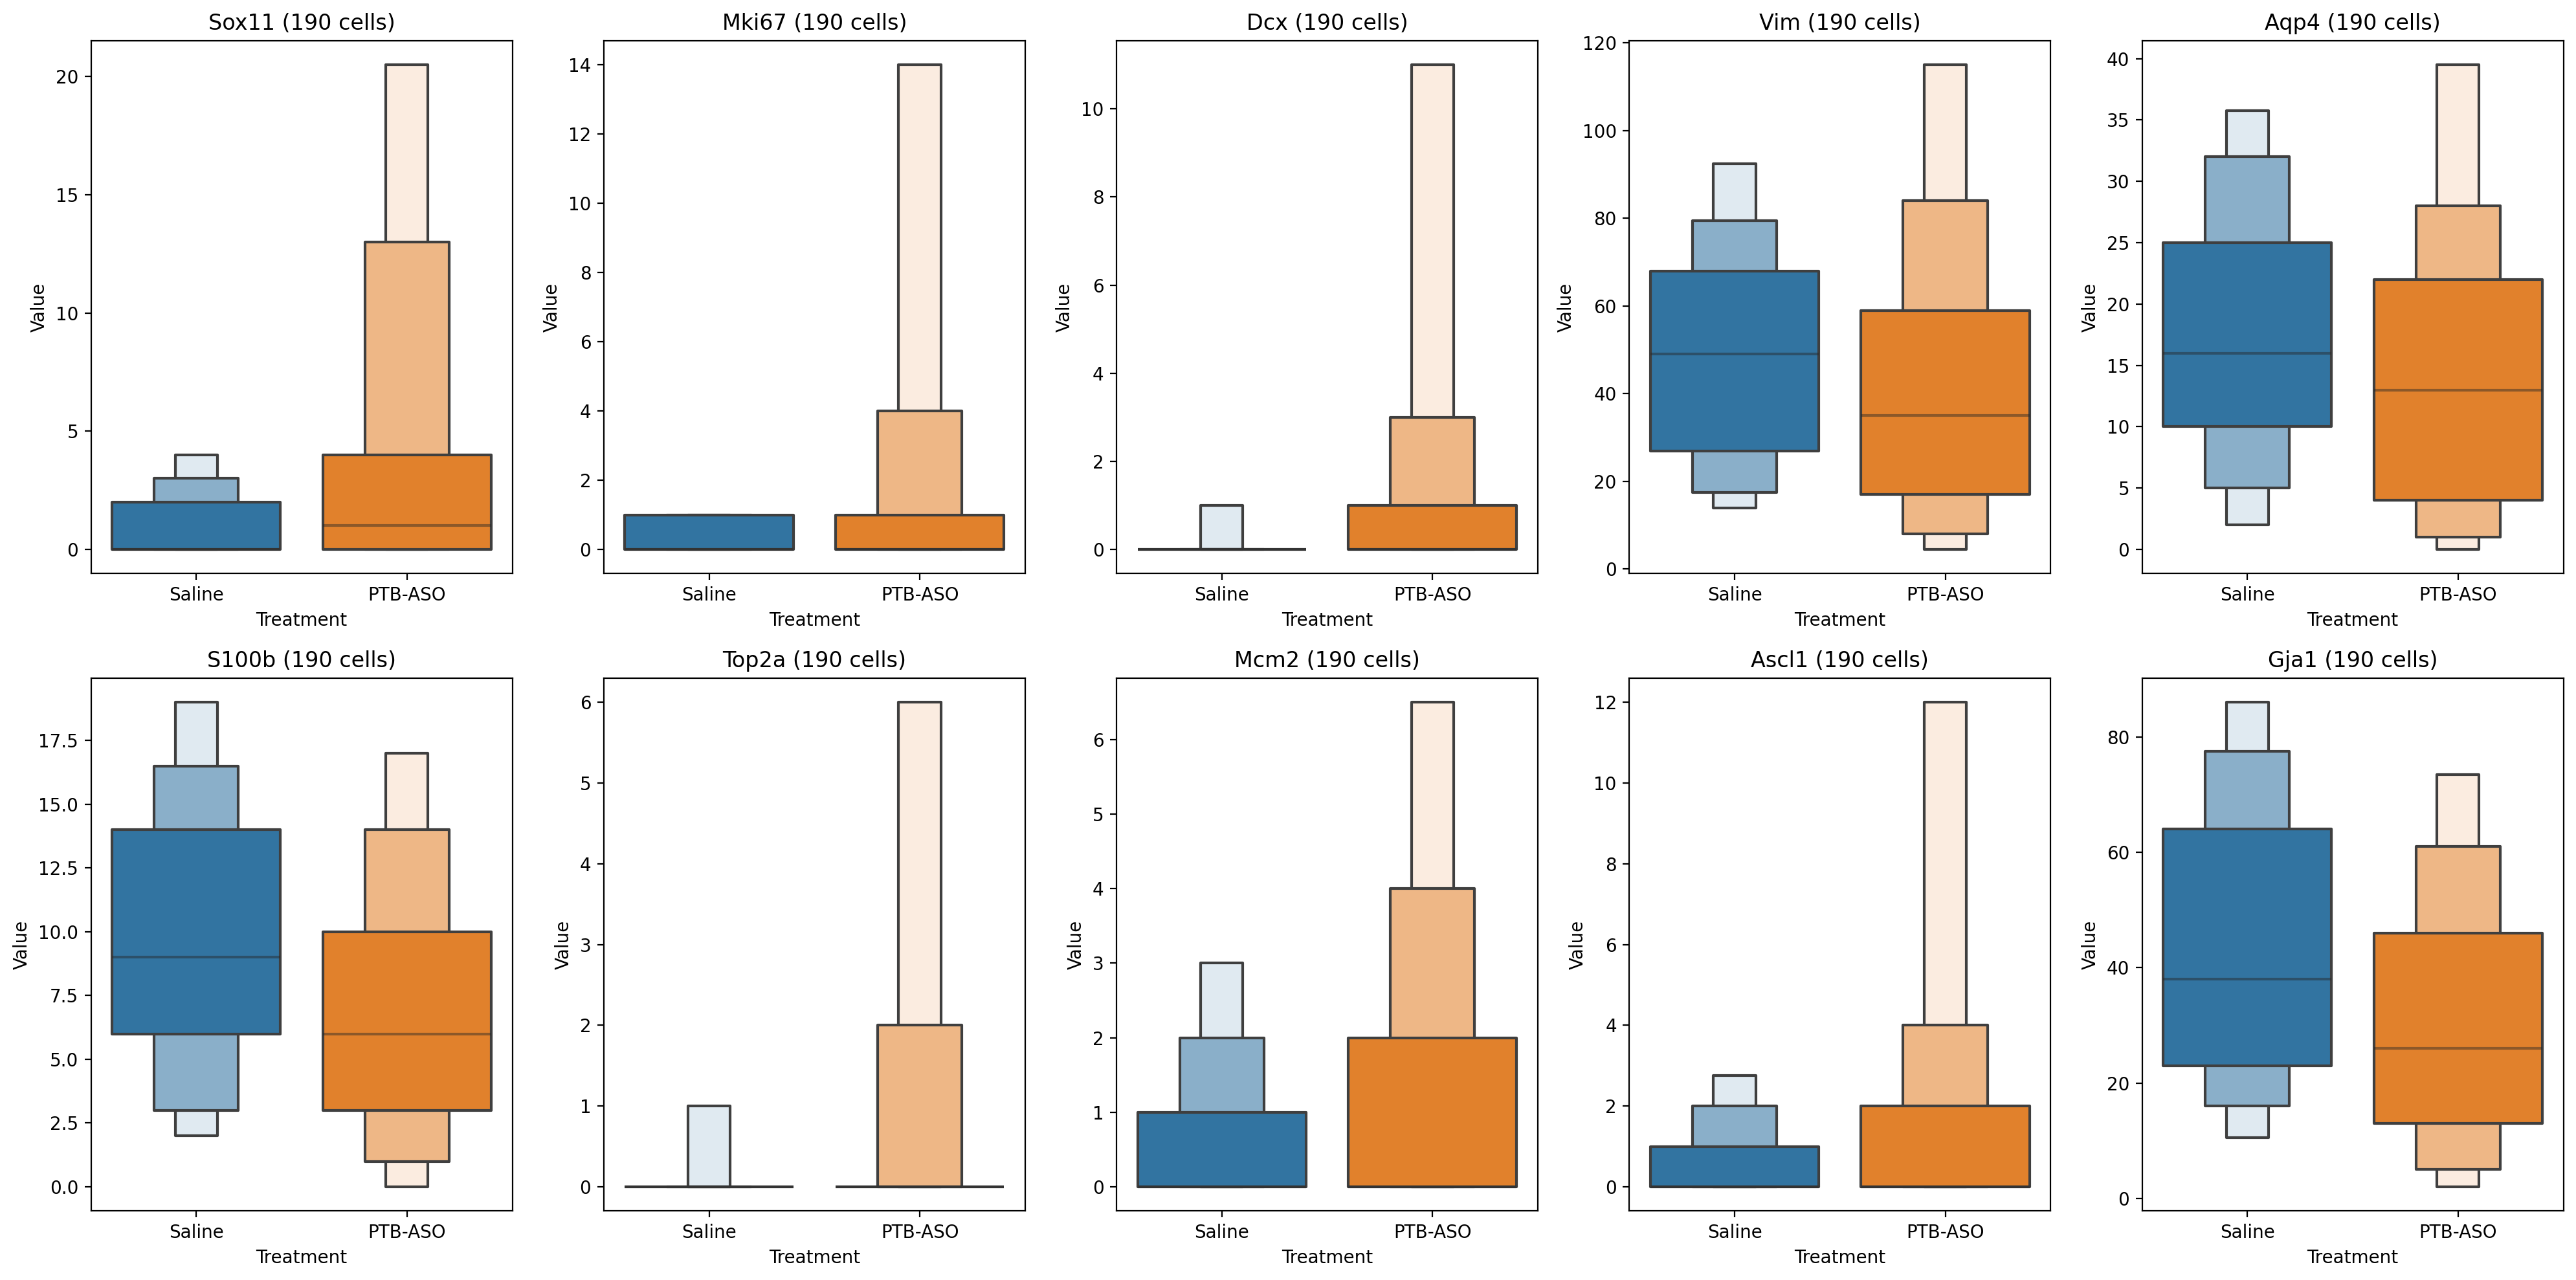

In [72]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.style.use("default")
d = stage1cbm5

genes = [
    "Sox11",
    "Mki67",
    "Dcx",
    "Vim",
    "Aqp4",
    "S100b",
    "Top2a",
    "Mcm2",
    "Ascl1",
    "Gja1",
    ]

data = {
    # "Ptbp1": d.obs["New_PTB"],
    #   
    # "Gad1": d.layers["Raw counts"][:, d.var_names.get_loc("Gad1")],  
    # "Prox1": d.layers["Raw counts"][:, d.var_names.get_loc("Prox1")],  
    "celltype": d.obs["Treatment"].tolist(),  
}

for gene in genes: 
    data[gene]= d.layers["Raw counts"][:, d.var_names.get_loc(gene)]
df = pd.DataFrame(data)

fig, axs = plt.subplots(2, 5, figsize=(20,10), dpi=100, facecolor="w")
for i, gene in enumerate(genes):
    ax = axs[np.unravel_index(i, (2,5))]
    df_melted = df.melt(id_vars=[gene], value_vars=["celltype"])
    sns.boxenplot(data=df_melted, x='value', y=gene, ax=ax, showfliers=False)
    # plt.title(cell)
    # plt.xlabel('Gene')
    # plt.ylabel('Value')

    # nums = list(np.sum(adata[adata.obs["batch"] == mouse].X, axis=1).flat)
    # plot_histogram(ax, nums, xmax=25000)
    ax.set_xlabel("Treatment")
    ax.set_ylabel("Value")
    # treatment = "Saline" if i < 3 else "PTB-ASO"
    ax.set_title(f"{gene} ({len(df_melted):,d} cells)")
plt.tight_layout()
# plt.savefig("figures/scrna_all_gens_total_tx_per_cel3.png", dpi=300, bbox_inches="tight", transparent=True)